In [117]:
source("Main.R")
source("Conf.R")
source("Utilities.R")
library("factoextra")
library("maptree")
library("ggpubr")
library("ica")
library("bayesbio")
#library(ICtest)

# library("AnnotationDbi")
# library("org.Mm.eg.db")
#library("clusterProfiler")


library(repr)
geneCutOff=4
targetCutOff=15
nFactors=15

require(DOSE)
options(future.globals.maxSize= 891289600)
options(HTTPConstants.CHUNKED = "false")



Loading required package: DOSE

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘DOSE’”


In [118]:
writePathwayFile <- function(pathwayGenes, fileName, cNames=F){
  maxlen <- max(lengths(pathwayGenes))
  pathwayGenes2 <- lapply(pathwayGenes, function(lst) c(lst, rep(NA, maxlen - length(lst))))

  pathwayGenes.df <- do.call("cbind", lapply(pathwayGenes2, as.data.frame)) 
  colnames(pathwayGenes.df) <- names(pathwayGenes)

  write.table(pathwayGenes.df,  fileName, sep=",", row.names = F, na = " ", quote = F, col.names = cNames)
}

In [119]:
selCoefs <- read.csv("./../TextFiles/SignificantCoefMatrix.csv", row.names = 1)
selCoefs <- t(selCoefs)
KOGenes <-  colnames(selCoefs)
KOGenes <- sapply(KOGenes, function(x){strsplit(x,"_")[[1]][2]})
colnames(selCoefs) <- KOGenes

In [120]:
dim(selCoefs)

[1] 1041  329

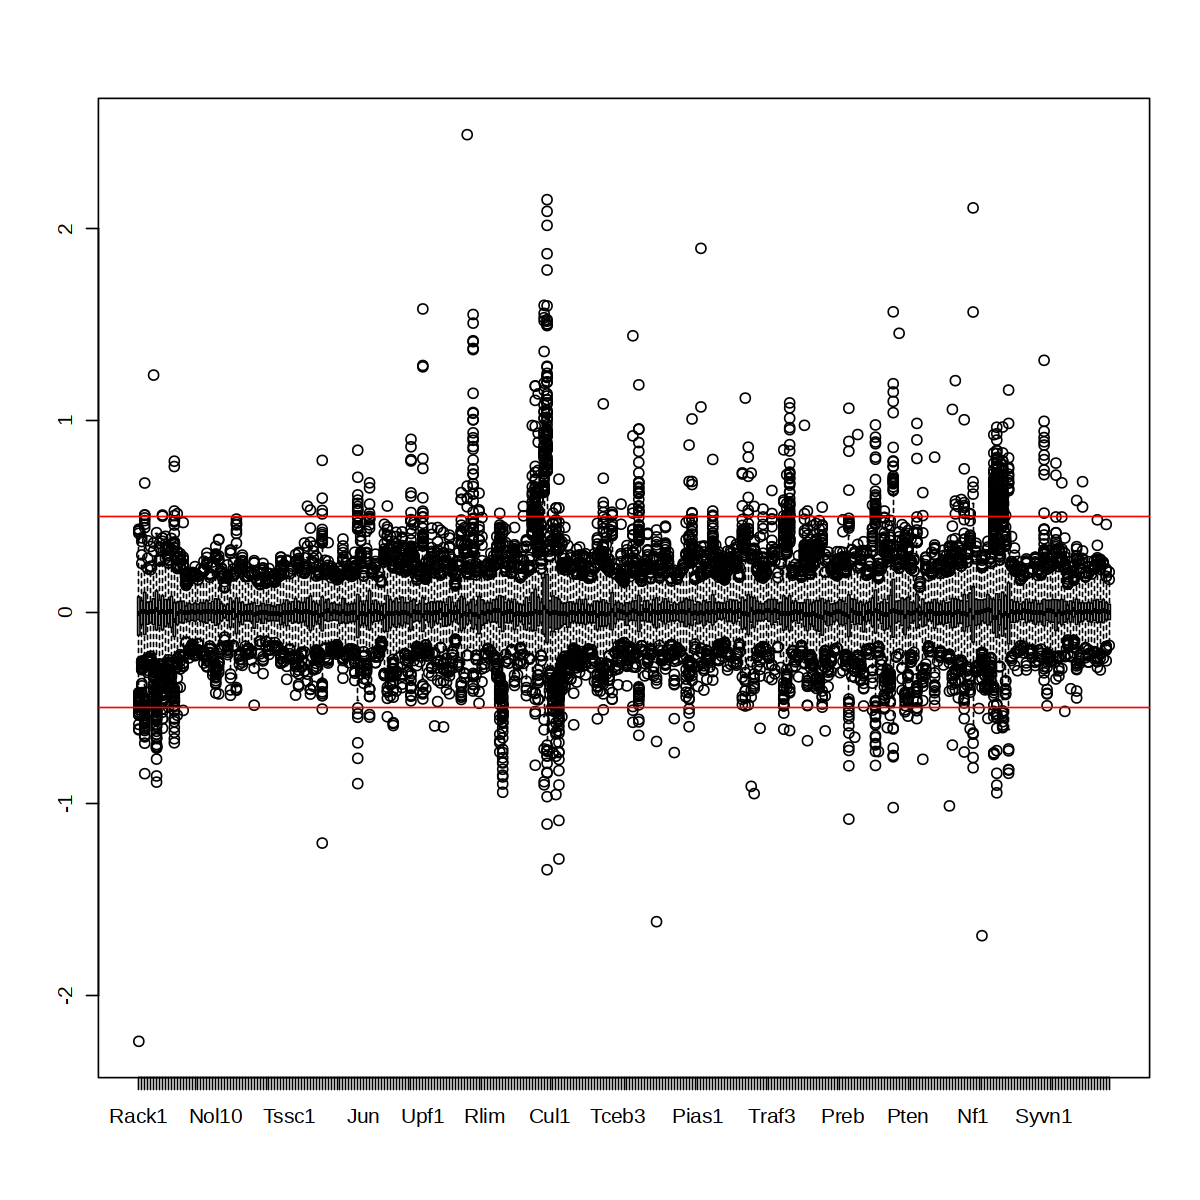

In [121]:
boxplot(selCoefs)
abline(h=0.5, col="red")
abline(h= -0.5, col="red")

In [122]:
#guideModulesN <- data.frame(read.csv("/home/beraslan/jovian-work/analysisSingle/ME_GuideModules_7_Modules.csv", row.names = 1))
#guideModulesN$GuideName <- sapply(guideModulesN$GuideName, function(x){strsplit(as.character(x),"_")[[1]][2]})

guideModulesN <- data.frame(read.csv("./../TextFiles/ME_GuideModules_leiden_6_Modules.csv"),  row.names = 1)
rownames(guideModulesN) <- guideModulesN$GuideName 
guideModulesN$GuideName <- NULL
guideModulesN$GuideGroup <- factor(guideModulesN$GuideGroup)
guideModulesN$GuideGroup <- paste0("K", guideModulesN$GuideGroup)

head(guideModulesN)

GuideGroup GuideColor
Aamp   K4         #aa40fc   
Bop1   K4         #aa40fc   
Cirh1a K4         #aa40fc   
Dcaf13 K4         #aa40fc   
Grb2   K4         #aa40fc   
Myc    K4         #aa40fc

In [123]:
#geneModulesN <- data.frame(read.csv("/home/beraslan/jovian-work/analysisSingle/ME_GeneModules_6_Modules.csv", row.names = 1))
geneModulesN <- data.frame(read.csv("./../TextFiles/ME_GeneModules_leiden_11_Modules.csv", row.names = 1))
rownames(geneModulesN) <- geneModulesN$GeneName
geneModulesN$GeneName = NULL
geneModulesN$GeneGroup <- factor(geneModulesN$GeneGroup)

head(geneModulesN)

GeneGroup GeneColor
AC160336.1 G0        #A6CEE3  
AI504432   G0        #A6CEE3  
AW112010   G0        #A6CEE3  
Adgre4     G0        #A6CEE3  
Adra2a     G0        #A6CEE3  
Apoe       G0        #A6CEE3

In [124]:
selCoefs

Rack1  Utp15  Wdr43  Raf1   Rrp9   Uhrf1  Myc    Wdr3   Aamp   Dcaf13
Eef1a1    -0.052 -0.147 -0.238 -0.125 -0.135  0.063 -0.397  0.028 -0.052 -0.101
Tpt1      -0.255 -0.096 -0.261 -0.026 -0.079 -0.218 -0.158 -0.159 -0.323 -0.190
Rps27     -0.289 -0.235 -0.094 -0.097 -0.104 -0.116 -0.167 -0.087 -0.081 -0.159
Rplp0     -0.328 -0.076 -0.110 -0.130 -0.008 -0.134 -0.586 -0.017 -0.031 -0.064
Denr      -0.140 -0.042 -0.027 -0.047 -0.070 -0.208 -0.079 -0.098  0.140 -0.104
Hmgb2     -0.078  0.024 -0.019 -0.001 -0.032 -0.083 -0.089  0.054  0.011 -0.039
Eif3f     -0.219 -0.082 -0.109 -0.088 -0.054 -0.203 -0.057 -0.196 -0.233 -0.069
Eif3e     -0.065 -0.078 -0.101 -0.034 -0.116 -0.039 -0.062  0.018  0.050 -0.102
Eif3k     -0.301 -0.236 -0.129 -0.032 -0.192 -0.005 -0.197 -0.016 -0.378 -0.148
Eif1      -0.199 -0.128 -0.172 -0.078 -0.081 -0.226  0.021 -0.006 -0.025  0.013
Rpl3      -0.422 -0.385 -0.843 -0.171 -0.246 -0.135 -0.385 -0.272 -0.376 -0.377
Rpl14     -0.273 -0.238 -0.491 -0.121 -0.211 -0.127 -0.449 -0.079 -0.326 -0.192
Rpl10a    -0.467 -0.420 -0.643 -0.116 -0.260 -0.088 -0.450 -0.209 -0.522 -0.334
Rps6      -0.451 -0.143 -0.347 -0.113 -0.209 -0.144 -0.381 -0.310 -0.281 -0.311
Rps27a    -0.458 -0.265 -0.684 -0.201 -0.215 -0.274 -0.700 -0.298 -0.557 -0.309
Rpl8      -0.463 -0.176 -0.352 -0.272 -0.111 -0.337 -0.691 -0.196 -0.415 -0.328
Rpl32     -0.440 -0.264 -0.405 -0.249 -0.137 -0.279 -0.703 -0.319 -0.235 -0.262
Rpl13     -0.614 -0.249 -0.577 -0.239 -0.117 -0.408 -0.887 -0.296 -0.309 -0.369
Rps8      -0.610 -0.373 -0.479 -0.315 -0.174 -0.253 -0.767 -0.404 -0.329 -0.419
Rps18     -0.522 -0.185 -0.384 -0.257 -0.196 -0.218 -0.521 -0.196 -0.389 -0.233
Rpl11     -0.536 -0.188 -0.651 -0.253 -0.176 -0.152 -0.368 -0.236 -0.140 -0.113
Rps17     -0.388 -0.297 -0.347 -0.122 -0.192 -0.218 -0.506 -0.125 -0.505 -0.211
Eef1g     -0.359 -0.098 -0.345 -0.129 -0.043 -0.199 -0.414 -0.117 -0.168 -0.258
Rpl12     -0.150 -0.267 -0.430 -0.170 -0.101 -0.289 -0.546 -0.125 -0.413 -0.111
Rps2      -0.231 -0.105 -0.232 -0.279 -0.143 -0.235 -0.522 -0.052 -0.186 -0.018
Rps12     -0.285  0.024 -0.340 -0.184 -0.109 -0.342 -0.653 -0.092 -0.236 -0.105
Rplp1     -0.058 -0.086 -0.298 -0.100 -0.108 -0.439 -0.855 -0.036 -0.249 -0.159
Rpl13a    -0.188 -0.132 -0.047 -0.063 -0.065 -0.065 -0.311 -0.112 -0.077 -0.060
Naca      -0.223 -0.184 -0.410 -0.073 -0.164 -0.011 -0.411 -0.188 -0.195 -0.236
Npm1      -0.073 -0.257 -0.316 -0.130 -0.085 -0.126 -0.311 -0.090 -0.229 -0.084
⋮         ⋮      ⋮      ⋮      ⋮      ⋮      ⋮      ⋮      ⋮      ⋮      ⋮     
Sat1       0.224  0.143  0.236 0.026   0.051  0.052  0.083  0.047 -0.013  0.016
Sh3glb1    0.063  0.085 -0.015 0.008   0.126 -0.006  0.091 -0.122  0.142  0.086
Sgpl1      0.100  0.062 -0.120 0.049   0.093  0.020  0.032  0.017  0.242  0.084
Grn       -0.065  0.078  0.048 0.090   0.042  0.062  0.058  0.089  0.165  0.136
Gns        0.229  0.010  0.354 0.212   0.087  0.059  0.082  0.094  0.033  0.049
Atp6v1b2   0.067  0.072  0.039 0.057   0.035  0.152  0.125  0.063  0.046  0.164
Cd44       0.124  0.144  0.110 0.058   0.108  0.203 -0.042  0.192  0.051 -0.098
Rnf149     0.259  0.107  0.234 0.205   0.124  0.060  0.027  0.164  0.069  0.088
Ptafr      0.188  0.017  0.149 0.117  -0.008  0.058  0.106  0.082  0.020  0.030
Cav1       0.049 -0.037 -0.020 0.128  -0.027  0.086 -0.046  0.078  0.164  0.154
Inhba      0.147  0.099 -0.071 0.040   0.007  0.187  0.143  0.149  0.037  0.098
Txnip      0.225  0.103  0.374 0.042   0.040 -0.009  0.205  0.068  0.111  0.026
Hist1h2bc  0.254  0.195  0.250 0.155   0.171  0.002  0.129  0.073 -0.124  0.202
Hist1h1c   0.110  0.063  0.182 0.038   0.113  0.151 -0.012  0.111  0.176  0.126
Nfe2l2     0.411 -0.025  0.115 0.073   0.036  0.075 -0.004  0.124 -0.231  0.040
Sowahc     0.218  0.056 -0.041 0.100   0.058  0.162  0.206  0.018 -0.023  0.029
Pim1       0.045  0.066  0.126 0.100   0.045  0.099  0.106  0.038  0.229 -0.044
Rai14      0.164  0.020 -0.069 0.023  -0.070 -0.061 -0.114  0.032  0.014 -0.018
Ahnak     

In [125]:
k <- icaimax(selCoefs, nc = 15, center = T)

In [126]:
dim(k$S)

[1] 1041   15

In [127]:
dim(k$M)

[1] 329  15

In [128]:
myH <- data.frame(t(k$S))
myW <- data.frame(k$M)
rownames(myW) <- KOGenes
colnames(myH) <- rownames(selCoefs)
rownames(myH) <- paste0("Factor ",1:nrow(myH))
colnames(myW) <- paste0("Factor ",1:ncol(myW))


In [129]:
dim(myW)

[1] 329  15

In [130]:
dim(myH)

[1]   15 1041

In [131]:
cor(t(myH))

Factor 1      Factor 2      Factor 3      Factor 4      Factor 5     
Factor 1   1.000000e+00 -3.268698e-16 -1.745870e-16 -1.089467e-17  7.625407e-16
Factor 2  -3.268698e-16  1.000000e+00 -7.196827e-17 -1.602305e-16  2.752509e-17
Factor 3  -1.745870e-16 -7.196827e-17  1.000000e+00  6.874868e-16  1.419519e-16
Factor 4  -1.089467e-17 -1.602305e-16  6.874868e-16  1.000000e+00  3.727635e-16
Factor 5   7.625407e-16  2.752509e-17  1.419519e-16  3.727635e-16  1.000000e+00
Factor 6  -2.230873e-16 -8.564639e-16  8.152611e-16 -1.092565e-17  4.041854e-16
Factor 7  -6.382000e-16  5.812602e-16 -4.514926e-17  1.611360e-16 -4.006507e-16
Factor 8   8.078051e-17  7.163957e-16 -3.346556e-16 -8.468288e-16  1.552099e-16
Factor 9   1.446913e-16 -8.309818e-16  1.213954e-15 -4.000779e-17 -3.514745e-16
Factor 10  2.582870e-16 -4.943180e-16 -6.451219e-17 -7.633492e-16  6.498367e-16
Factor 11 -1.259663e-16 -1.476950e-16  3.831473e-17  2.089951e-16 -6.805247e-16
Factor 12 -2.443148e-16  2.282008e-16 -4.249517e-16  9.141428e-16 -9.151464e-17
Factor 13 -2.233951e-16  8.443932e-16  3.889874e-16 -9.939668e-16  1.350128e-15
Factor 14  3.288042e-17  4.720161e-16  1.888932e-16 -6.638283e-16  1.055269e-16
Factor 15  3.251661e-16 -8.270510e-17  6.291757e-16 -4.088164e-16  2.995786e-16
          Factor 6      Factor 7      Factor 8      Factor 9      Factor 10    
Factor 1  -2.230873e-16 -6.382000e-16  8.078051e-17  1.446913e-16  2.582870e-16
Factor 2  -8.564639e-16  5.812602e-16  7.163957e-16 -8.309818e-16 -4.943180e-16
Factor 3   8.152611e-16 -4.514926e-17 -3.346556e-16  1.213954e-15 -6.451219e-17
Factor 4  -1.092565e-17  1.611360e-16 -8.468288e-16 -4.000779e-17 -7.633492e-16
Factor 5   4.041854e-16 -4.006507e-16  1.552099e-16 -3.514745e-16  6.498367e-16
Factor 6   1.000000e+00 -6.976908e-16 -5.884938e-16 -5.916071e-16 -9.694322e-17
Factor 7  -6.976908e-16  1.000000e+00  7.699205e-16 -5.294367e-16 -9.470589e-17
Factor 8  -5.884938e-16  7.699205e-16  1.000000e+00  1.013828e-15 -5.201870e-16
Factor 9  -5.916071e-16 -5.294367e-16  1.013828e-15  1.000000e+00  5.943119e-16
Factor 10 -9.694322e-17 -9.470589e-17 -5.201870e-16  5.943119e-16  1.000000e+00
Factor 11  4.700096e-16  3.619001e-16 -1.827240e-16  6.313831e-16  7.931285e-18
Factor 12 -7.603378e-17 -3.941440e-16  1.430079e-16 -3.166742e-16  4.015666e-16
Factor 13 -3.104642e-16 -6.386757e-16 -1.213907e-16 -9.424343e-16 -6.920206e-16
Factor 14  3.262494e-16  1.570019e-16 -9.084010e-17  3.572836e-16  2.613849e-16
Factor 15 -2.137684e-16 -3.157121e-16  3.419245e-16 -3.125830e-16  4.610024e-16
          Factor 11     Factor 12     Factor 13     Factor 14     Factor 15    
Factor 1  -1.259663e-16 -2.443148e-16 -2.233951e-16  3.288042e-17  3.251661e-16
Factor 2  -1.476950e-16  2.282008e-16  8.443932e-16  4.720161e-16 -8.270510e-17
Factor 3   3.831473e-17 -4.249517e-16  3.889874e-16  1.888932e-16  6.291757e-16
Factor 4   2.089951e-16  9.141428e-16 -9.939668e-16 -6.638283e-16 -4.088164e-16
Factor 5  -6.805247e-16 -9.151464e-17  1.350128e-15  1.055269e-16  2.995786e-16
Factor 6   4.700096e-16 -7.603378e-17 -3.104642e-16  3.262494e-16 -2.137684e-16
Factor 7   3.619001e-16 -3.941440e-16 -6.386757e-16  1.570019e-16 -3.157121e-16
Factor 8  -1.827240e-16  1.430079e-16 -1.213907e-16 -9.084010e-17  3.419245e-16
Factor 9   6.313831e-16 -3.166742e-16 -9.424343e-16  3.572836e-16 -3.125830e-16
Factor 10  7.931285e-18  4.015666e-16 -6.920206e-16  2.613849e-16  4.610024e-16
Factor 11  1.000000e+00 -8.583638e-17 -3.162214e-17 -3.610747e-16 -1.017634e-15
Factor 12 -8.583638e-17  1.000000e+00  9.157625e-16 -4.332556e-16 -2.060870e-16
Factor 13 -3.162214e-17  9.157625e-16  1.000000e+00 -1.870308e-16  5.343686e-16
Factor 14 -3.610747e-16 -4.332556e-16 -1.870308e-16  1.000000e+00 -5.358620e-16
Factor 15 -1.017634e-15 -2.060870e-16  5.343686e-16 -5.358620e-16  1.000000e+00

In [132]:
cor(myW)

Factor 1     Factor 2    Factor 3    Factor 4    Factor 5   
Factor 1   1.000000000  0.12817628 -0.31877312 -0.08674446  0.07366566
Factor 2   0.128176279  1.00000000  0.01609553  0.29284800 -0.16376436
Factor 3  -0.318773124  0.01609553  1.00000000  0.19157870  0.14121760
Factor 4  -0.086744464  0.29284800  0.19157870  1.00000000 -0.23426890
Factor 5   0.073665659 -0.16376436  0.14121760 -0.23426890  1.00000000
Factor 6  -0.009994968  0.05074382  0.22849466  0.20414819 -0.19283518
Factor 7   0.234340056 -0.09520730 -0.15024766 -0.20079261  0.20049492
Factor 8  -0.179835457  0.15690022  0.02905911  0.31825396 -0.11685515
Factor 9  -0.069269745 -0.20664155  0.10116578  0.07432711 -0.14813323
Factor 10 -0.125753183  0.04893098  0.11472745  0.09034684 -0.08512568
Factor 11  0.358468940  0.14818081 -0.23740350  0.19461480 -0.11752033
Factor 12  0.351458845  0.02083831 -0.01573199 -0.18504072 -0.09368531
Factor 13  0.137993380  0.17675137  0.19739490 -0.25302096  0.28103068
Factor 14 -0.207559437 -0.15786223  0.23520535 -0.14280871  0.08923367
Factor 15  0.071642775  0.17270036  0.23265169  0.18990923  0.15051548
          Factor 6     Factor 7    Factor 8     Factor 9    Factor 10  
Factor 1  -0.009994968  0.23434006 -0.179835457 -0.06926975 -0.12575318
Factor 2   0.050743818 -0.09520730  0.156900217 -0.20664155  0.04893098
Factor 3   0.228494664 -0.15024766  0.029059106  0.10116578  0.11472745
Factor 4   0.204148190 -0.20079261  0.318253957  0.07432711  0.09034684
Factor 5  -0.192835184  0.20049492 -0.116855154 -0.14813323 -0.08512568
Factor 6   1.000000000 -0.10385419  0.107999477  0.17300521 -0.02625821
Factor 7  -0.103854188  1.00000000 -0.283991336 -0.16757866 -0.21008317
Factor 8   0.107999477 -0.28399134  1.000000000  0.02443299  0.17004655
Factor 9   0.173005207 -0.16757866  0.024432993  1.00000000  0.18479472
Factor 10 -0.026258205 -0.21008317  0.170046549  0.18479472  1.00000000
Factor 11  0.023712297  0.01486996  0.050430023  0.05638378  0.10215140
Factor 12 -0.002602997  0.33394070 -0.265792570 -0.10949901 -0.08262068
Factor 13 -0.210988570  0.23769243 -0.233572135 -0.28524292 -0.11931815
Factor 14 -0.008870044 -0.07365265  0.005603635  0.05797420  0.06424067
Factor 15  0.056559912 -0.05106499  0.010507937  0.03147890 -0.10708151
          Factor 11   Factor 12    Factor 13   Factor 14    Factor 15  
Factor 1   0.35846894  0.351458845  0.13799338 -0.207559437  0.07164278
Factor 2   0.14818081  0.020838314  0.17675137 -0.157862229  0.17270036
Factor 3  -0.23740350 -0.015731990  0.19739490  0.235205349  0.23265169
Factor 4   0.19461480 -0.185040718 -0.25302096 -0.142808707  0.18990923
Factor 5  -0.11752033 -0.093685308  0.28103068  0.089233670  0.15051548
Factor 6   0.02371230 -0.002602997 -0.21098857 -0.008870044  0.05655991
Factor 7   0.01486996  0.333940701  0.23769243 -0.073652648 -0.05106499
Factor 8   0.05043002 -0.265792570 -0.23357214  0.005603635  0.01050794
Factor 9   0.05638378 -0.109499007 -0.28524292  0.057974196  0.03147890
Factor 10  0.10215140 -0.082620678 -0.11931815  0.064240666 -0.10708151
Factor 11  1.00000000  0.002697940 -0.15845395 -0.265337385 -0.02980577
Factor 12  0.00269794  1.000000000  0.19989044  0.027946039 -0.11666139
Factor 13 -0.15845395  0.199890441  1.00000000  0.144466938  0.09892543
Factor 14 -0.26533738  0.027946039  0.14446694  1.000000000  0.03976787
Factor 15 -0.02980577 -0.116661389  0.09892543  0.039767873  1.00000000

In [133]:
head(geneModulesN)

GeneGroup GeneColor
AC160336.1 G0        #A6CEE3  
AI504432   G0        #A6CEE3  
AW112010   G0        #A6CEE3  
Adgre4     G0        #A6CEE3  
Adra2a     G0        #A6CEE3  
Apoe       G0        #A6CEE3

In [134]:
plotFactorHeatmap <- function(coefsAll, sKOGenes, sEffectGenes, elem){
  tempDF <- t(coefsAll[sEffectGenes, sKOGenes])
  #tmpPVals <- pValsAllAdj[sTargets, sGenes]
  #tempDF[tmpPVals > 0.1] <- 0
  tempDF[tempDF > 0.2] = 0.2
  tempDF[tempDF < -0.2] = -0.2
   
  annoCols<-list(GeneGroup=c(G0='#A6CEE3',
                           G1='#1F78B4',
                           G2='#B2DF8A',
                           G3='#33A02C', 
                           G4='#FB9A99', 
                           G5='#FDBF6F', 
                           G6='#FF7F00', 
                           G7='#CAB2D6',
                           G8='#6A3D9A', 
                           G9='#FFFF99', 
                           G10="#B5651D" ),
                 GuideGroup=c(K0="#1f77b4",
                              K1="#ff7f0e",
                              K2="#279e68",
                              K3="#d62728", 
                              K4="#aa40fc", 
                              K5="#8c564b"))
    
  annotDFcol <- geneModulesN[colnames(tempDF),]
  annotDFrow <- guideModulesN[rownames(tempDF),]
    
  annotDFcol$GeneColor = NULL
  annotDFrow$GuideColor = NULL
    
  options(repr.plot.width=10, repr.plot.height=16)
  km2 <- pheatmap(t(tempDF), main = paste0("Factor ",elem),
           na_col = "grey",  
           annotation_row = annotDFcol,
            annotation_col = annotDFrow,
            annotation_colors = annoCols,
           clustering_method="ward.D2",
           clustering_distance_rows="euclidean",
           clustering_distance_cols="euclidean", colorRampPalette(c("blue", "white", "orange"))(100))
    
  save_pheatmap_pdf(km2, paste0("Factor ",elem,".pdf"), width=10, height=16)
  
  koOrder= colnames(tempDF)[km2$tree_col$order]
  geneOrder = rownames(tempDF)[km2$tree_row$order]
    
  geneClusters=cutree(km2$tree_row, h=1)
  i=1
  while(length(unique(geneClusters)) > 2){
    i = (i+0.5)
    geneClusters <- cutree(km2$tree_row, h=i)
  }
  
    
  geneClusters_one <- names(geneClusters[geneClusters==1])
  geneClusters_two <- names(geneClusters[geneClusters==2])
    
    
  guideClusters=cutree(km2$tree_col, h=1)
  i=1
  while(length(unique(guideClusters)) > 2){
    i = (i+0.5)
    guideClusters <- cutree(km2$tree_col, h=i)
  }
  
  guideClusters_one <- names(guideClusters[guideClusters==1])
  guideClusters_two <- names(guideClusters[guideClusters==2])
    
  return(list("geneClusters_one"=geneClusters_one, "geneClusters_two"=geneClusters_two,
              "guideClusters_one"=guideClusters_one, "guideClusters_two"=guideClusters_two,
             "geneOrder" = geneOrder, "koOrder" = koOrder))
}


In [135]:
getOutliers_up <- function(x){
  qX <- quantile(x)
  IQR = qX[4] - qX[2]
  minLev = qX[2] - IQR
  maxLev = qX[4] + IQR
  return(x[ x > maxLev])
}

getOutliers_down <- function(x){
  qX <- quantile(x)
  IQR = qX[4] - qX[2]
  minLev = qX[2] - IQR
  maxLev = qX[4] + IQR
  
  return(x[ x < minLev])
}

getOutliers2_up <- function(x){
  qX <- quantile(x)
  IQR = qX[4] - qX[2]
  minLev = qX[2] - 1.3*IQR
  maxLev = qX[4] + 1.3*IQR
    
  return(x[ x > maxLev ])
  
  
}

getOutliers2_down <- function(x){
  qX <- quantile(x)
  IQR = qX[4] - qX[2]
  minLev = qX[2] - 1.3*IQR
  maxLev = qX[4] + 1.3*IQR
  
  return(x[ x < minLev ])
}

[1] "############## FACTOR : 1 ##################"
[1] "############## FACTOR : 2 ##################"


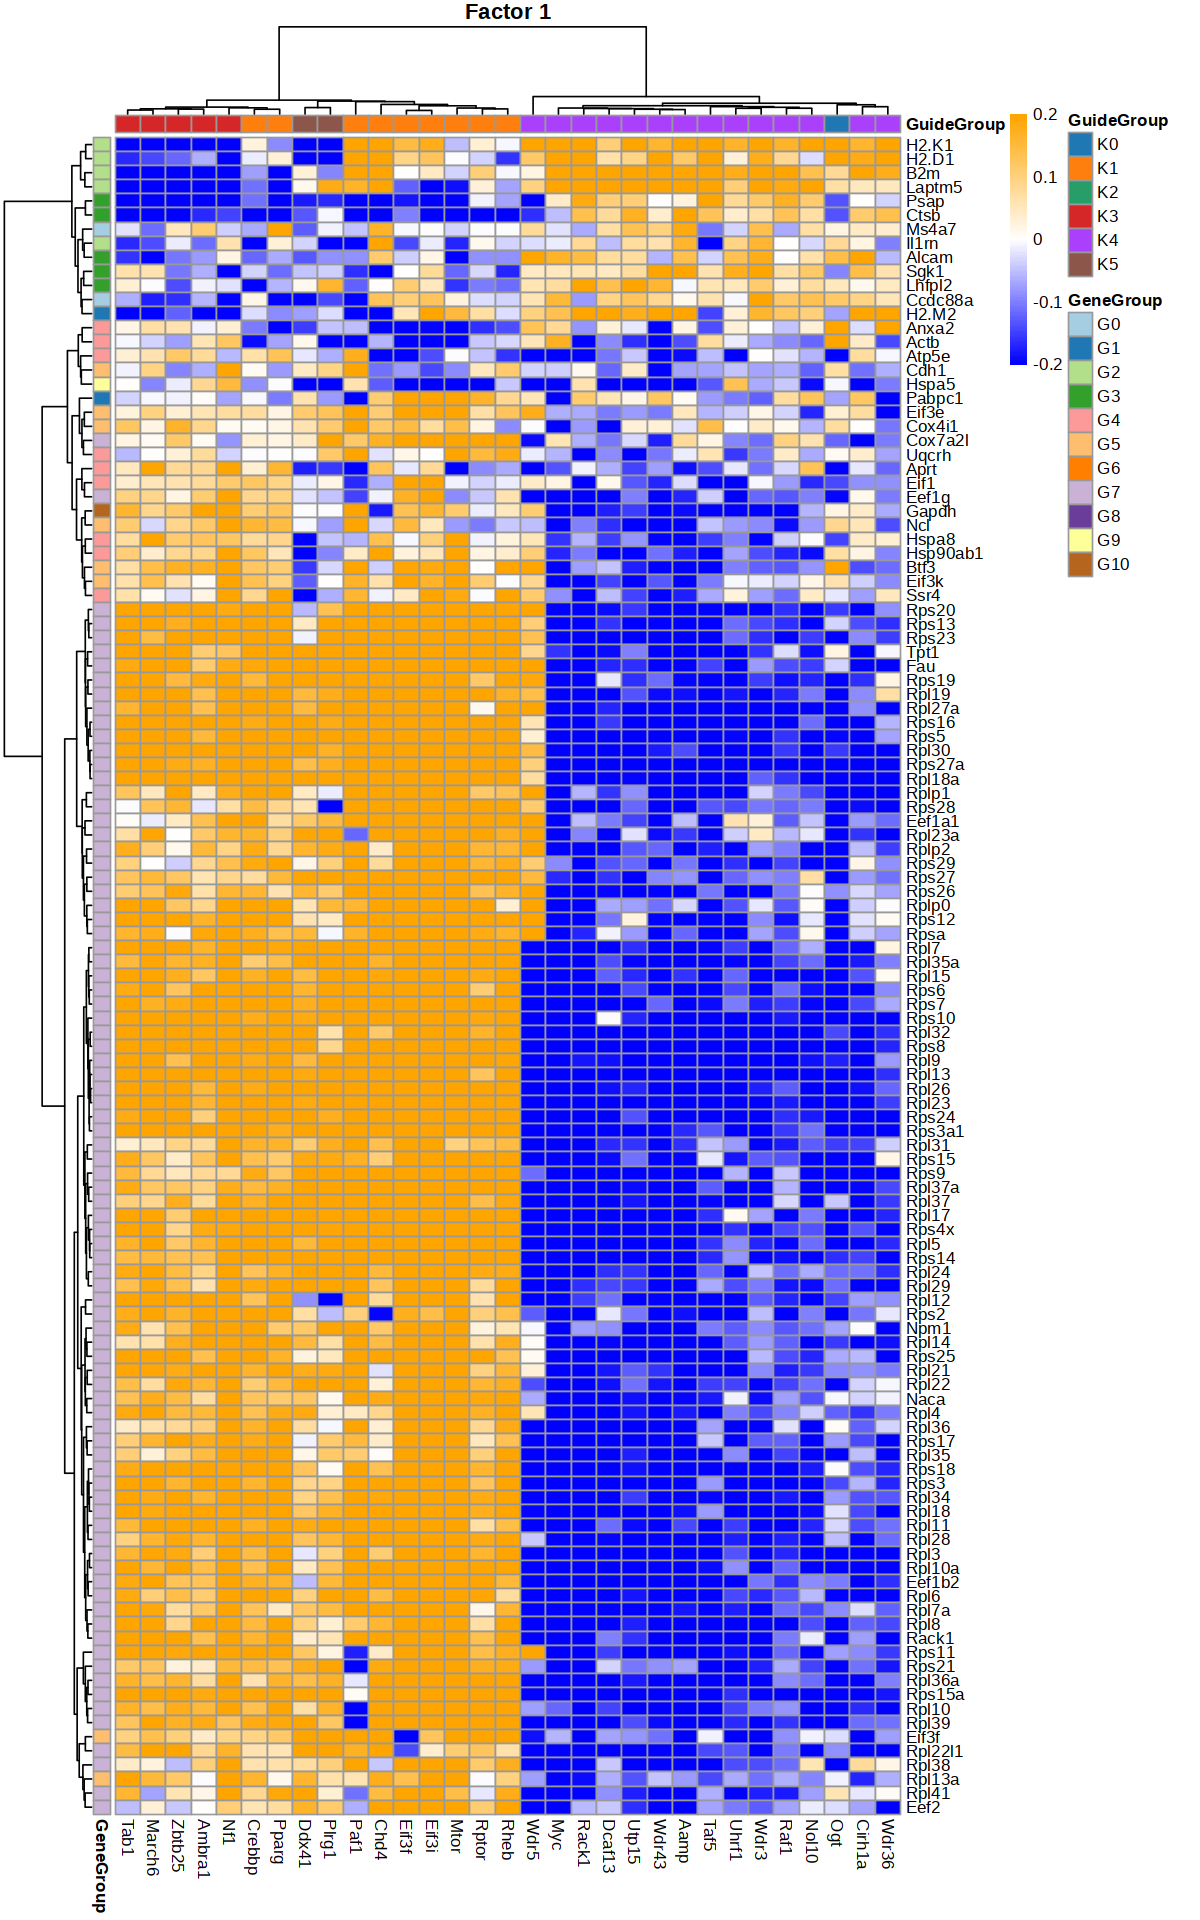

[1] "############## FACTOR : 3 ##################"


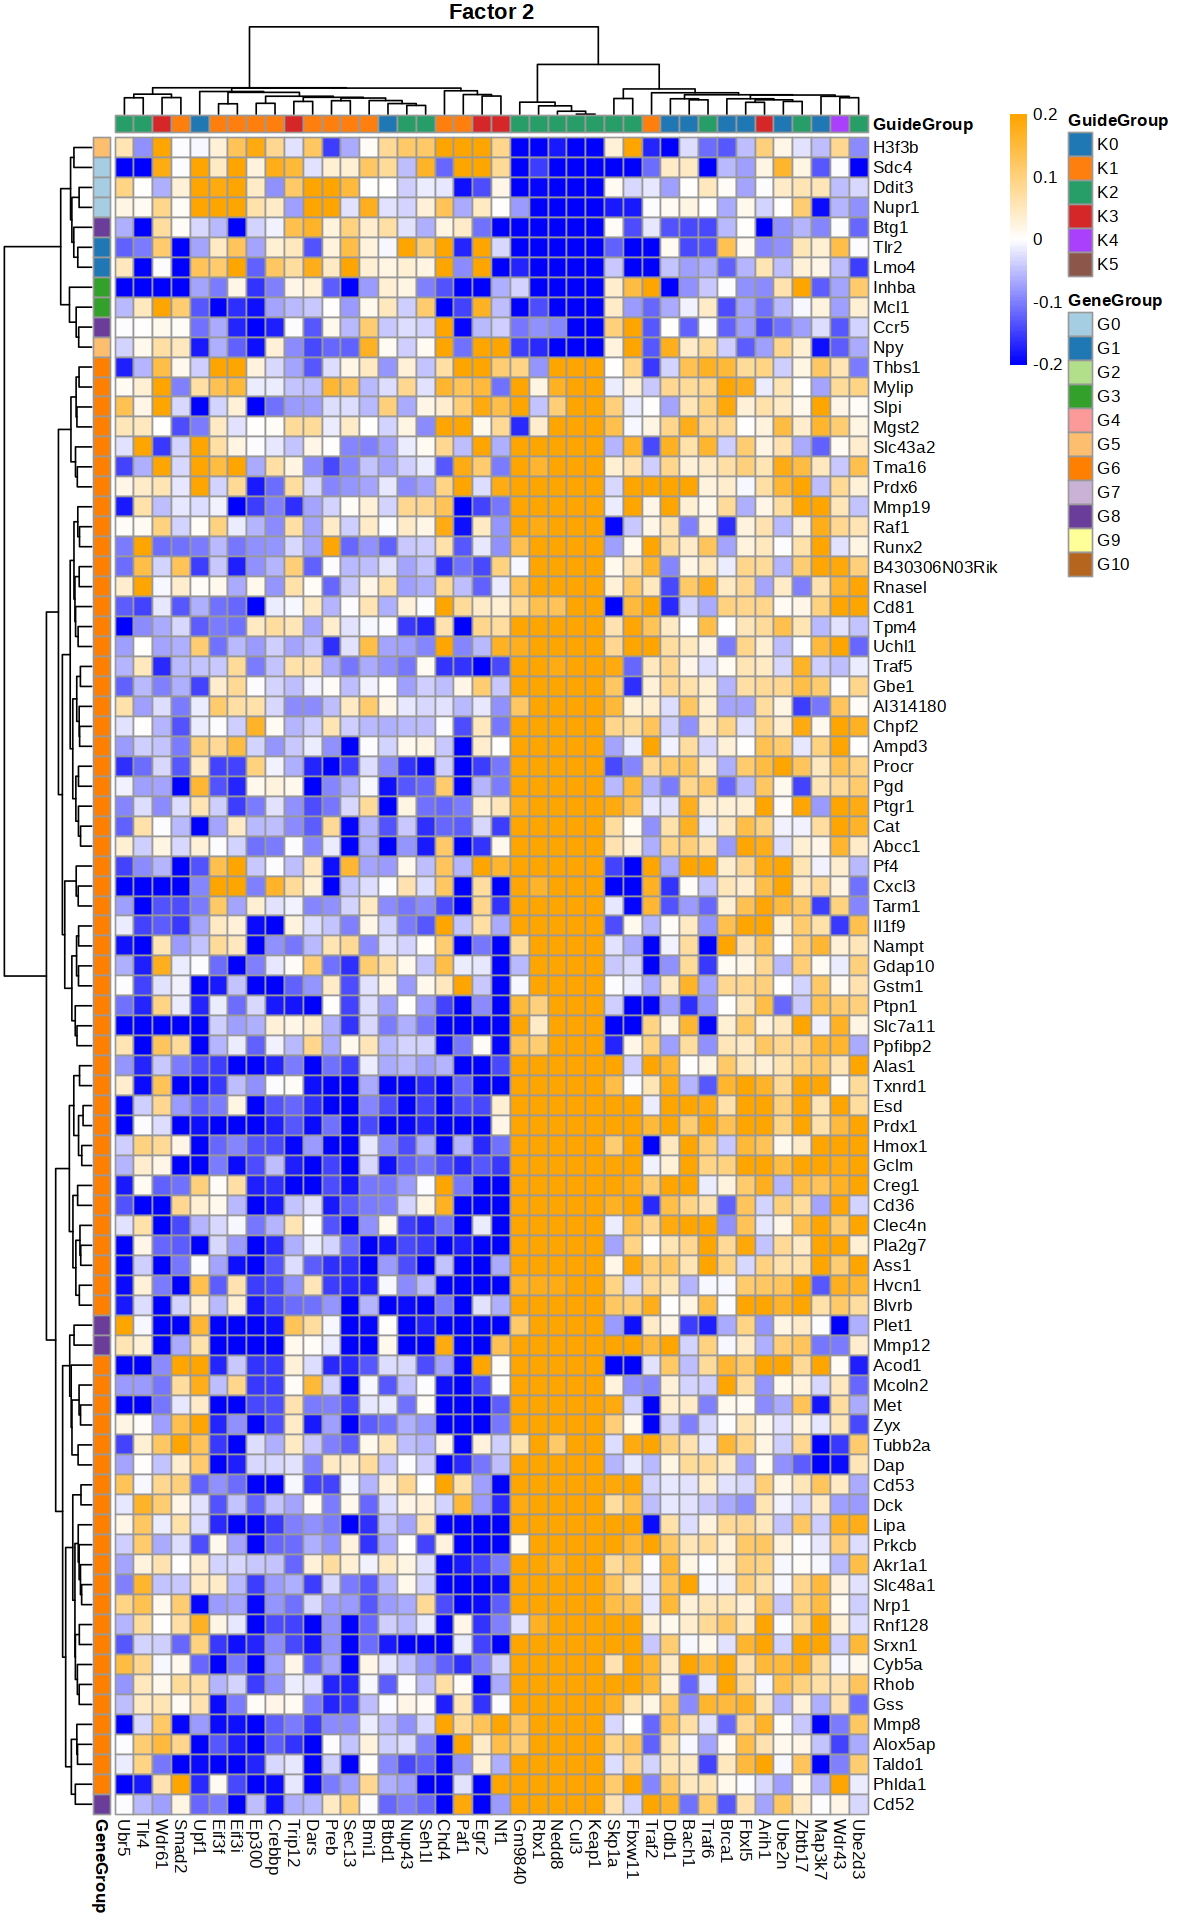

[1] "############## FACTOR : 4 ##################"


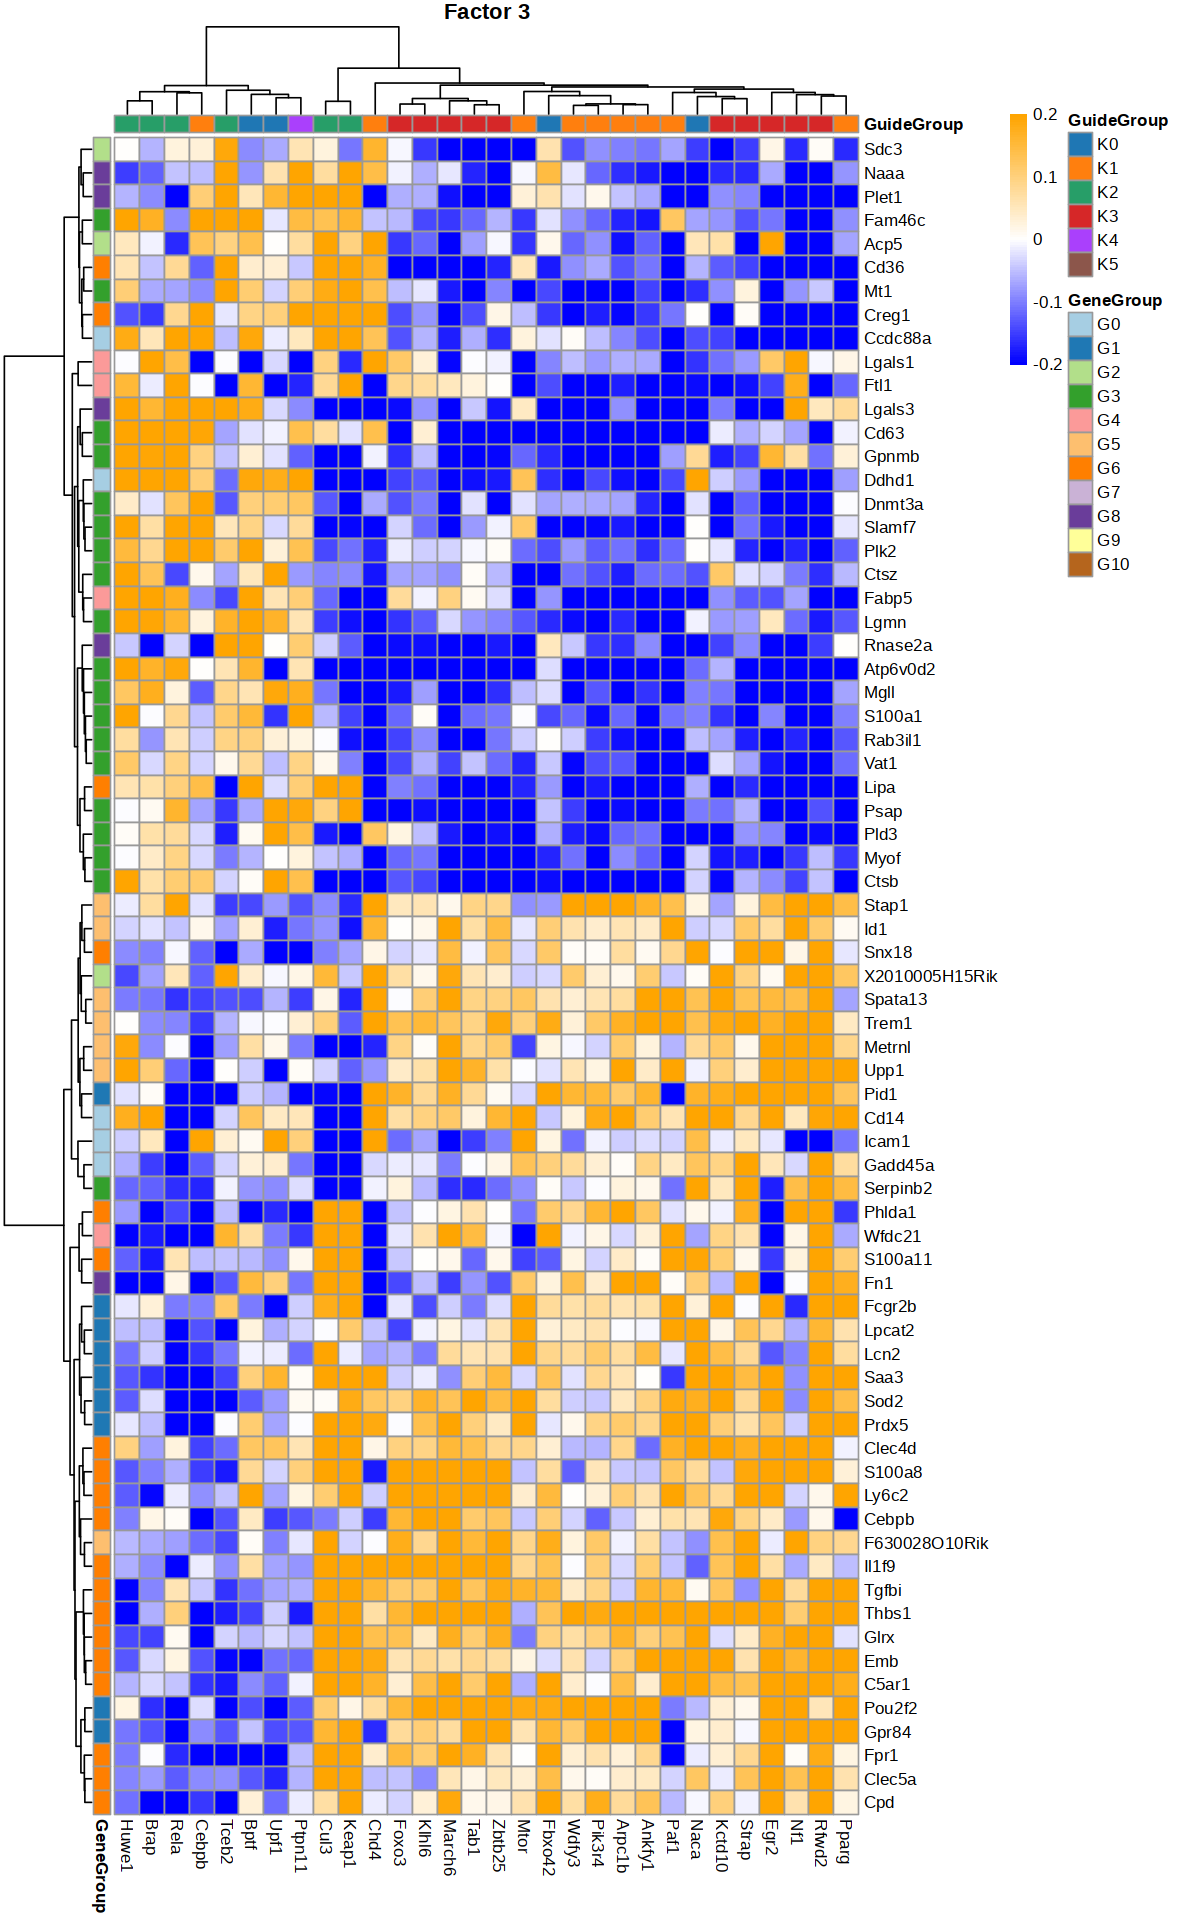

[1] "############## FACTOR : 5 ##################"


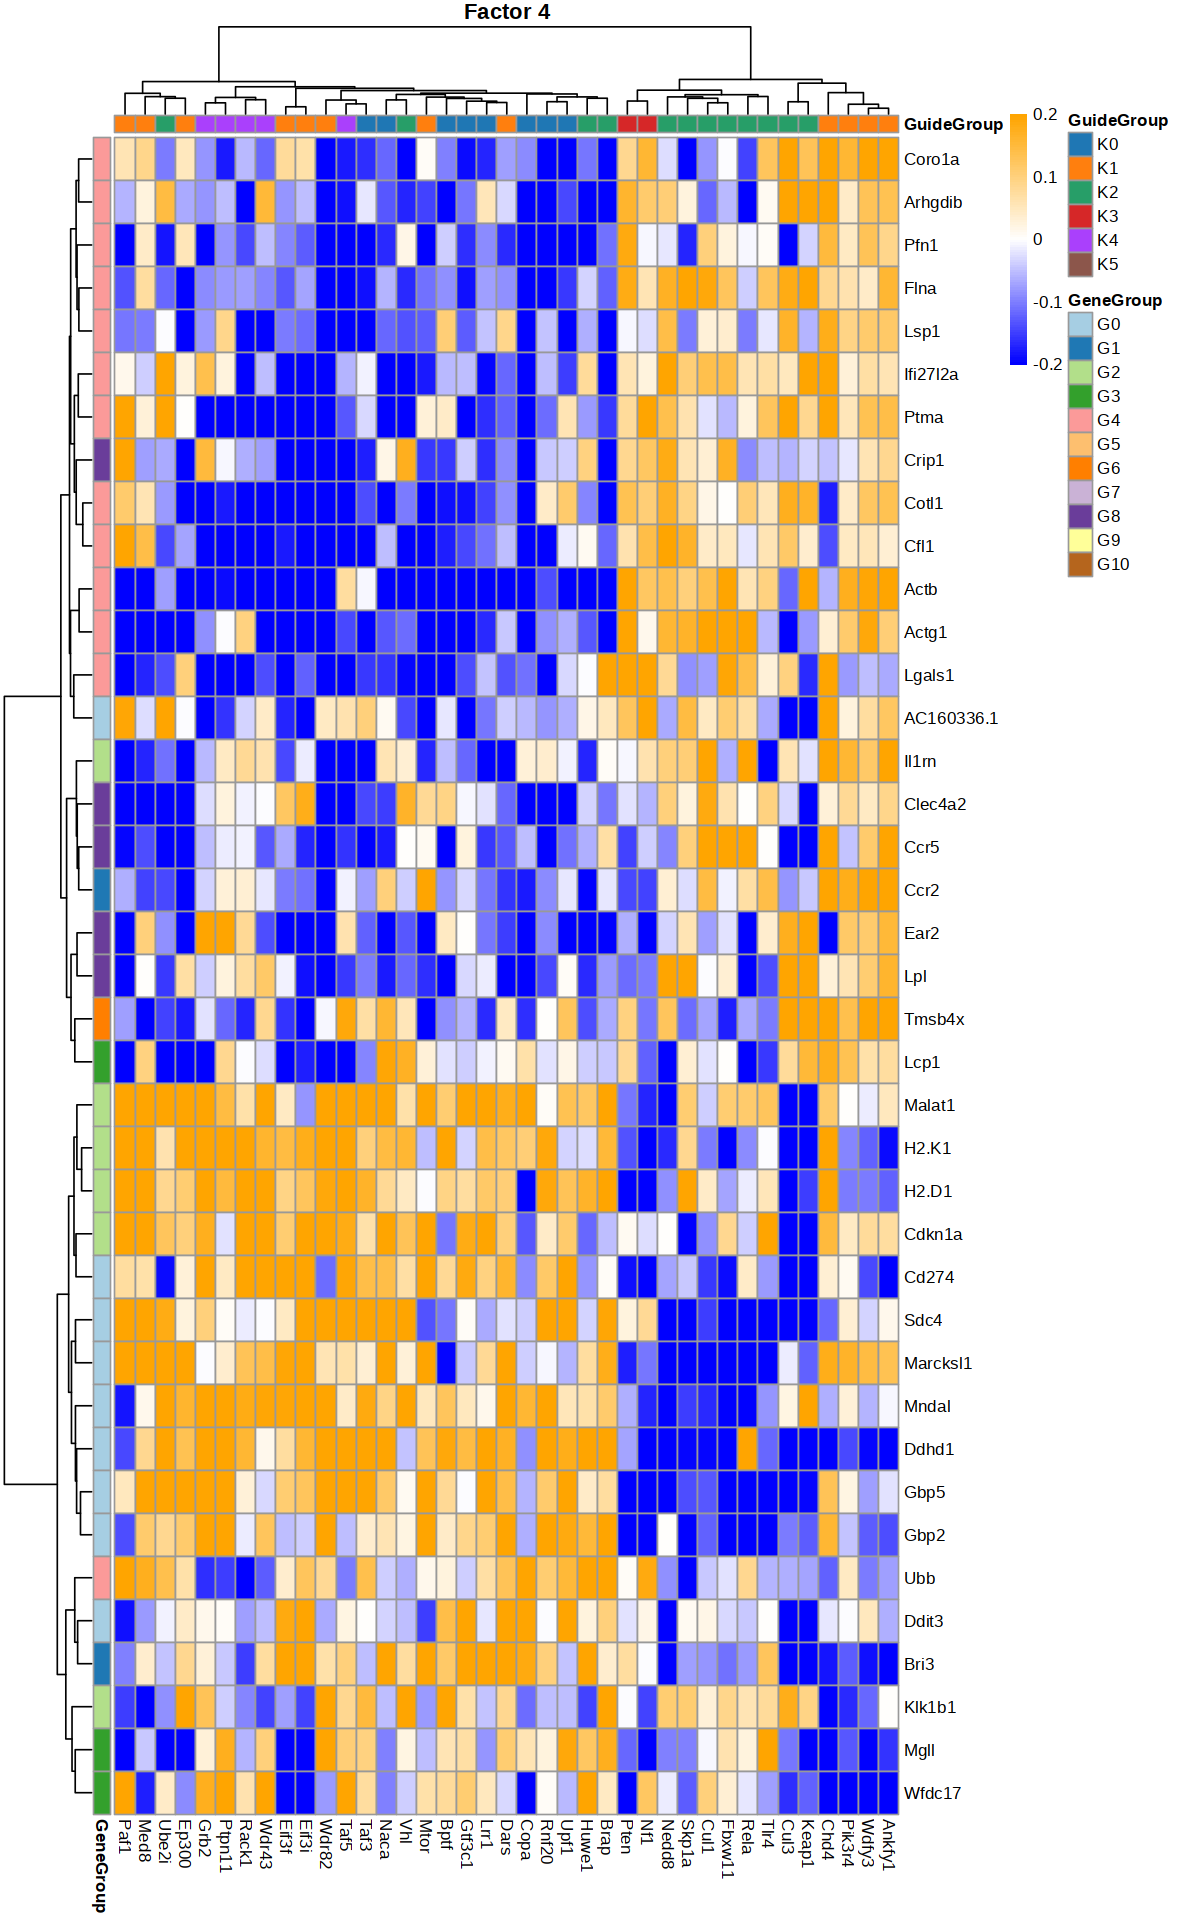

[1] "############## FACTOR : 6 ##################"


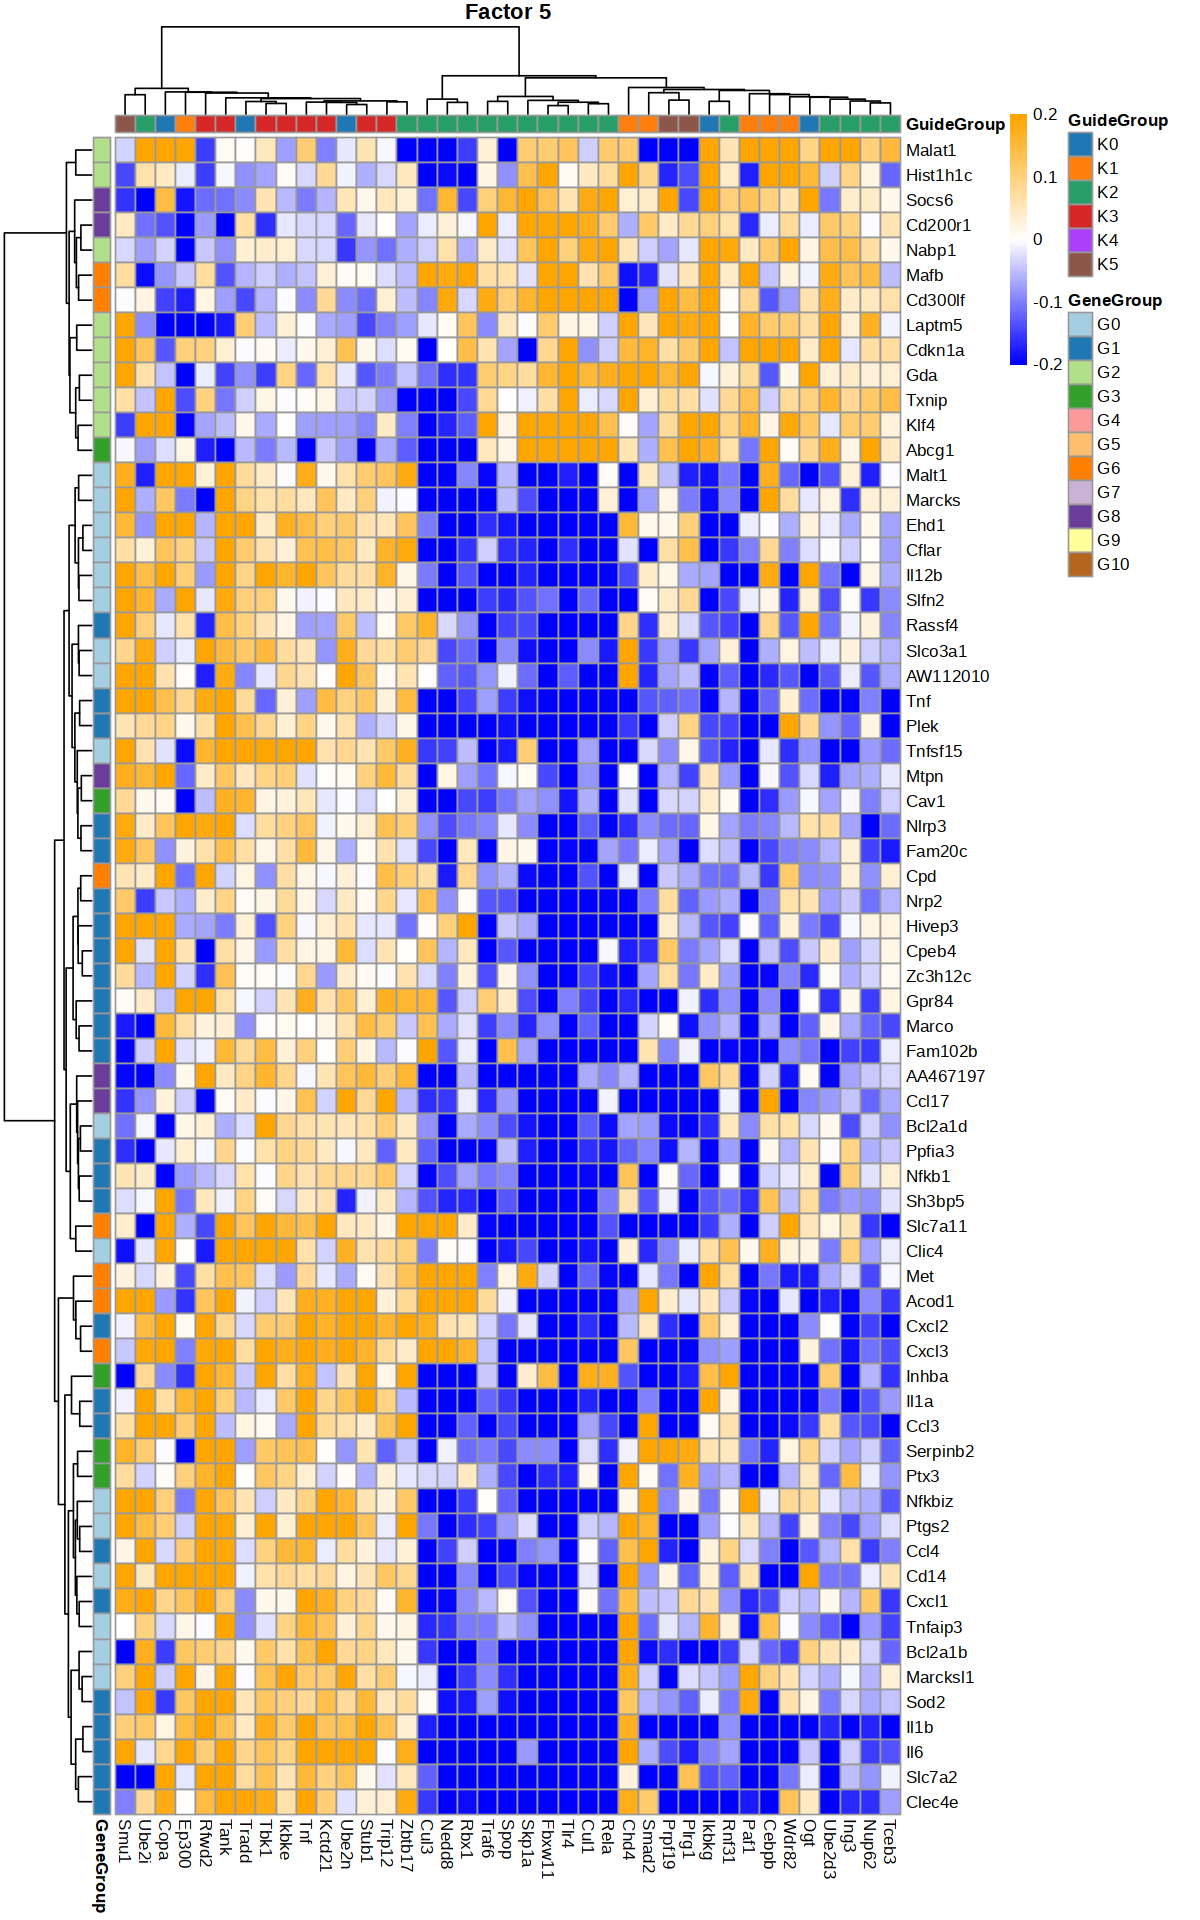

[1] "############## FACTOR : 7 ##################"


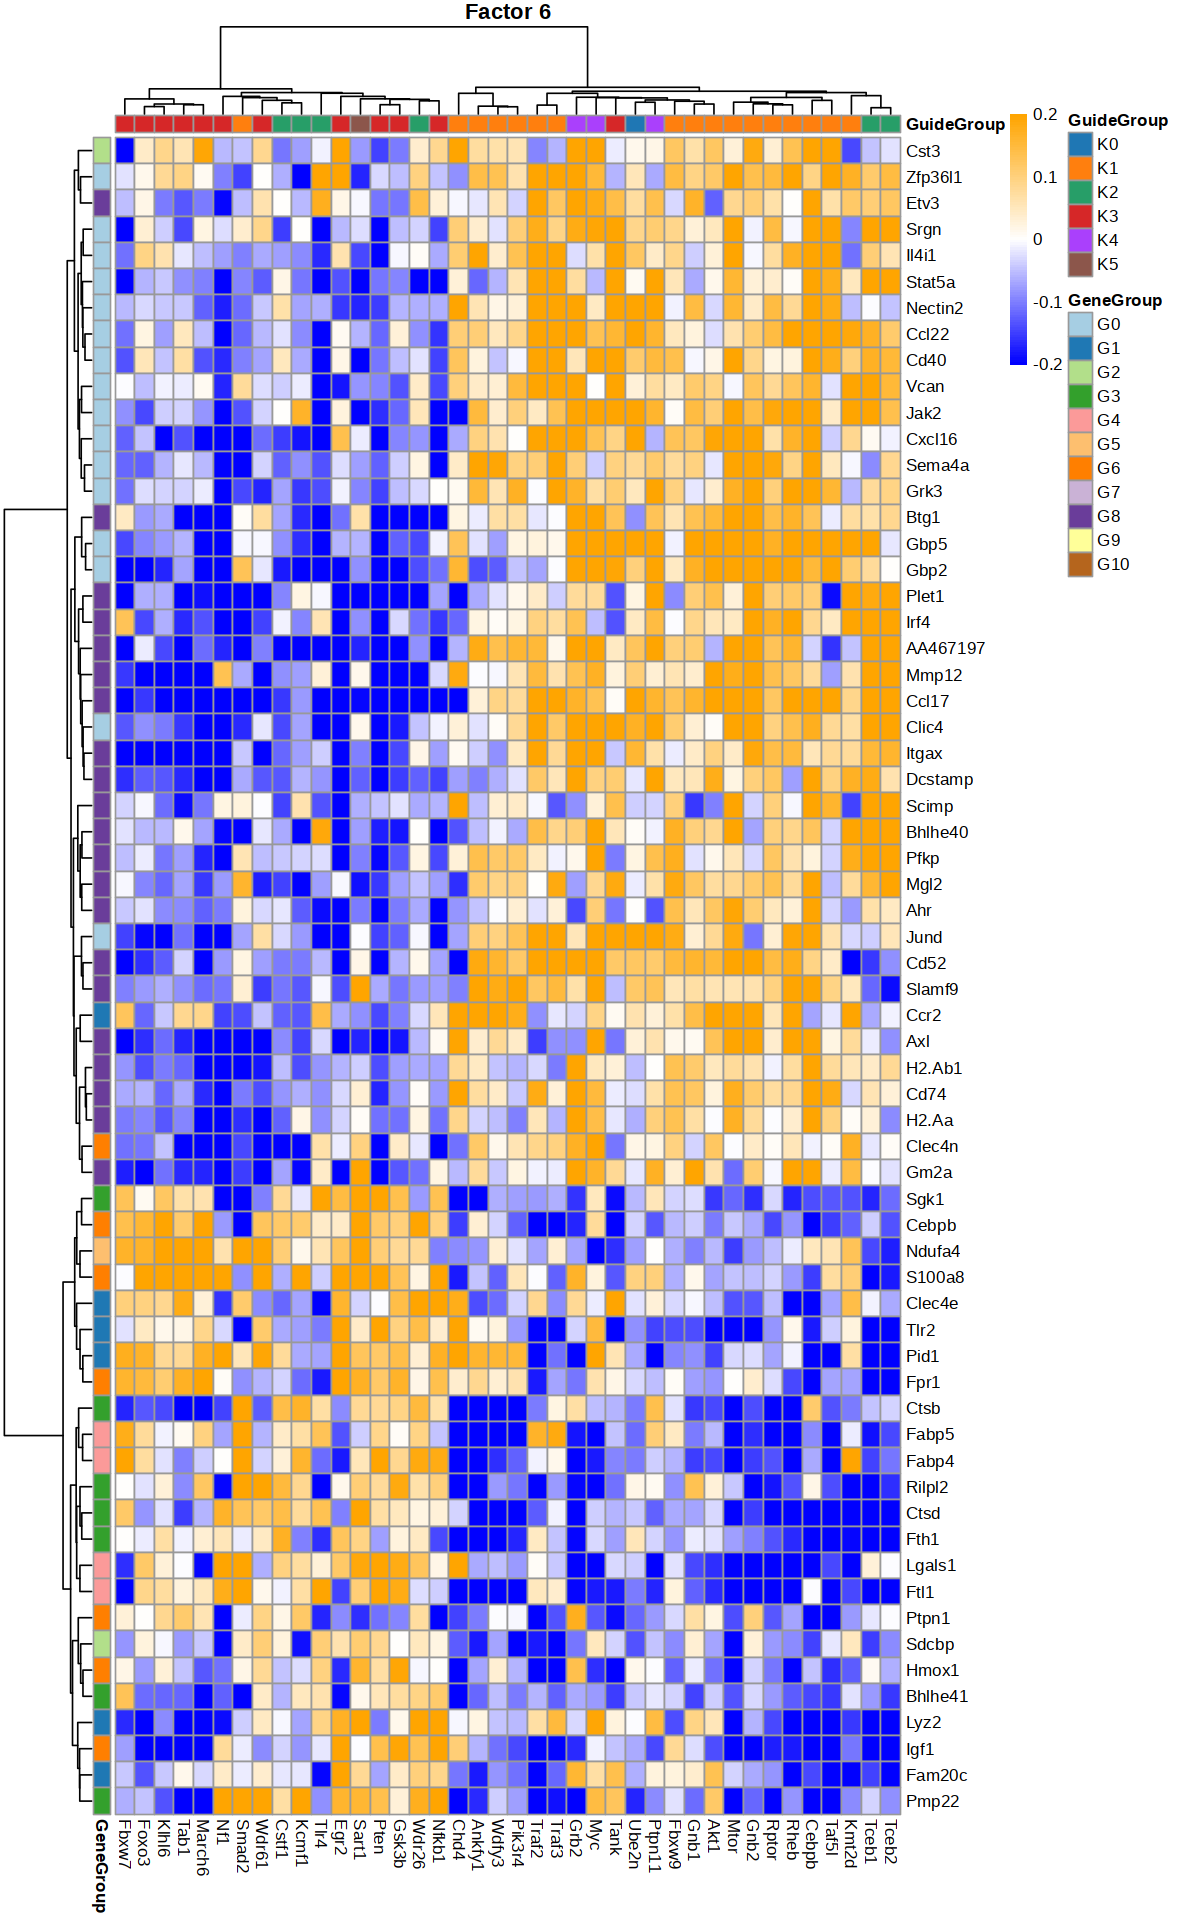

[1] "############## FACTOR : 8 ##################"


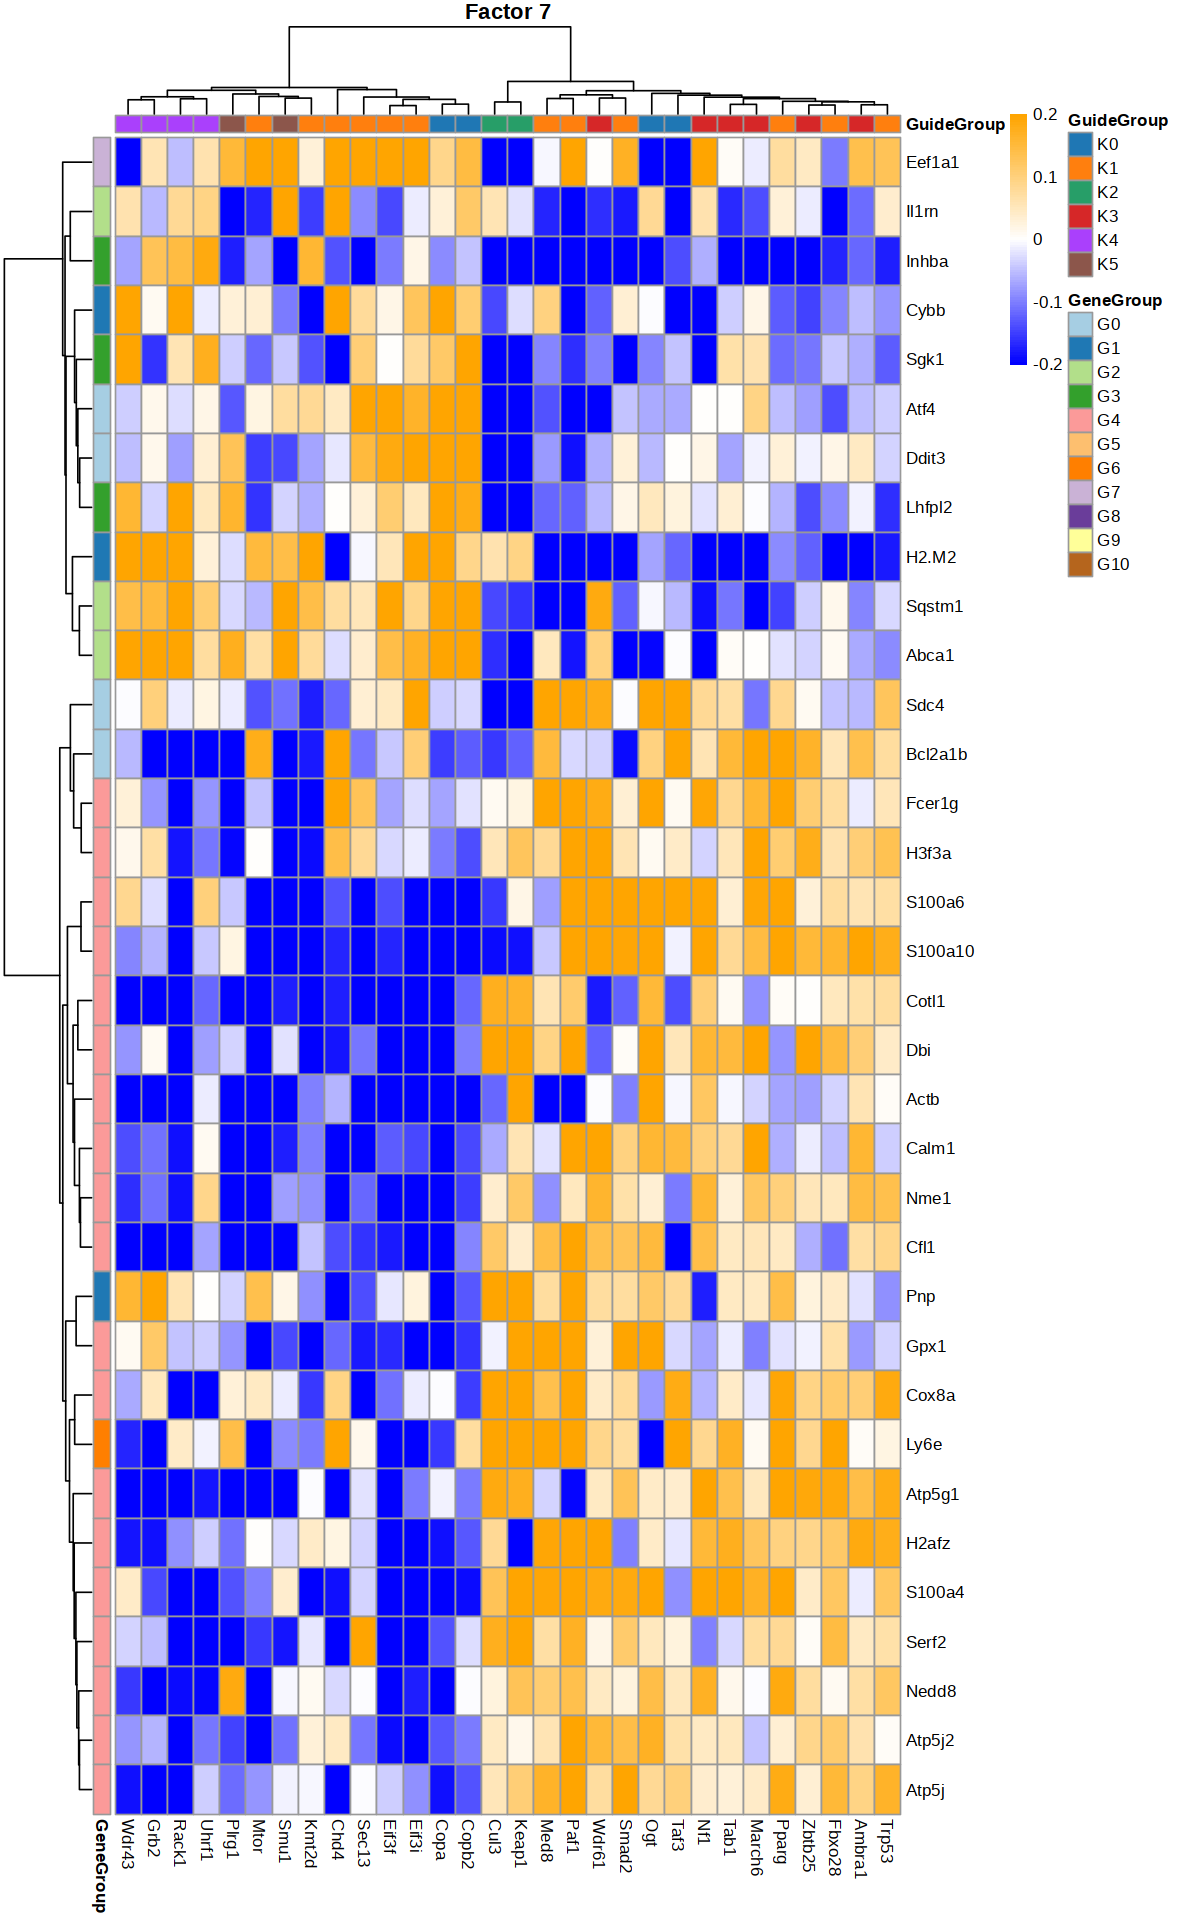

[1] "############## FACTOR : 9 ##################"


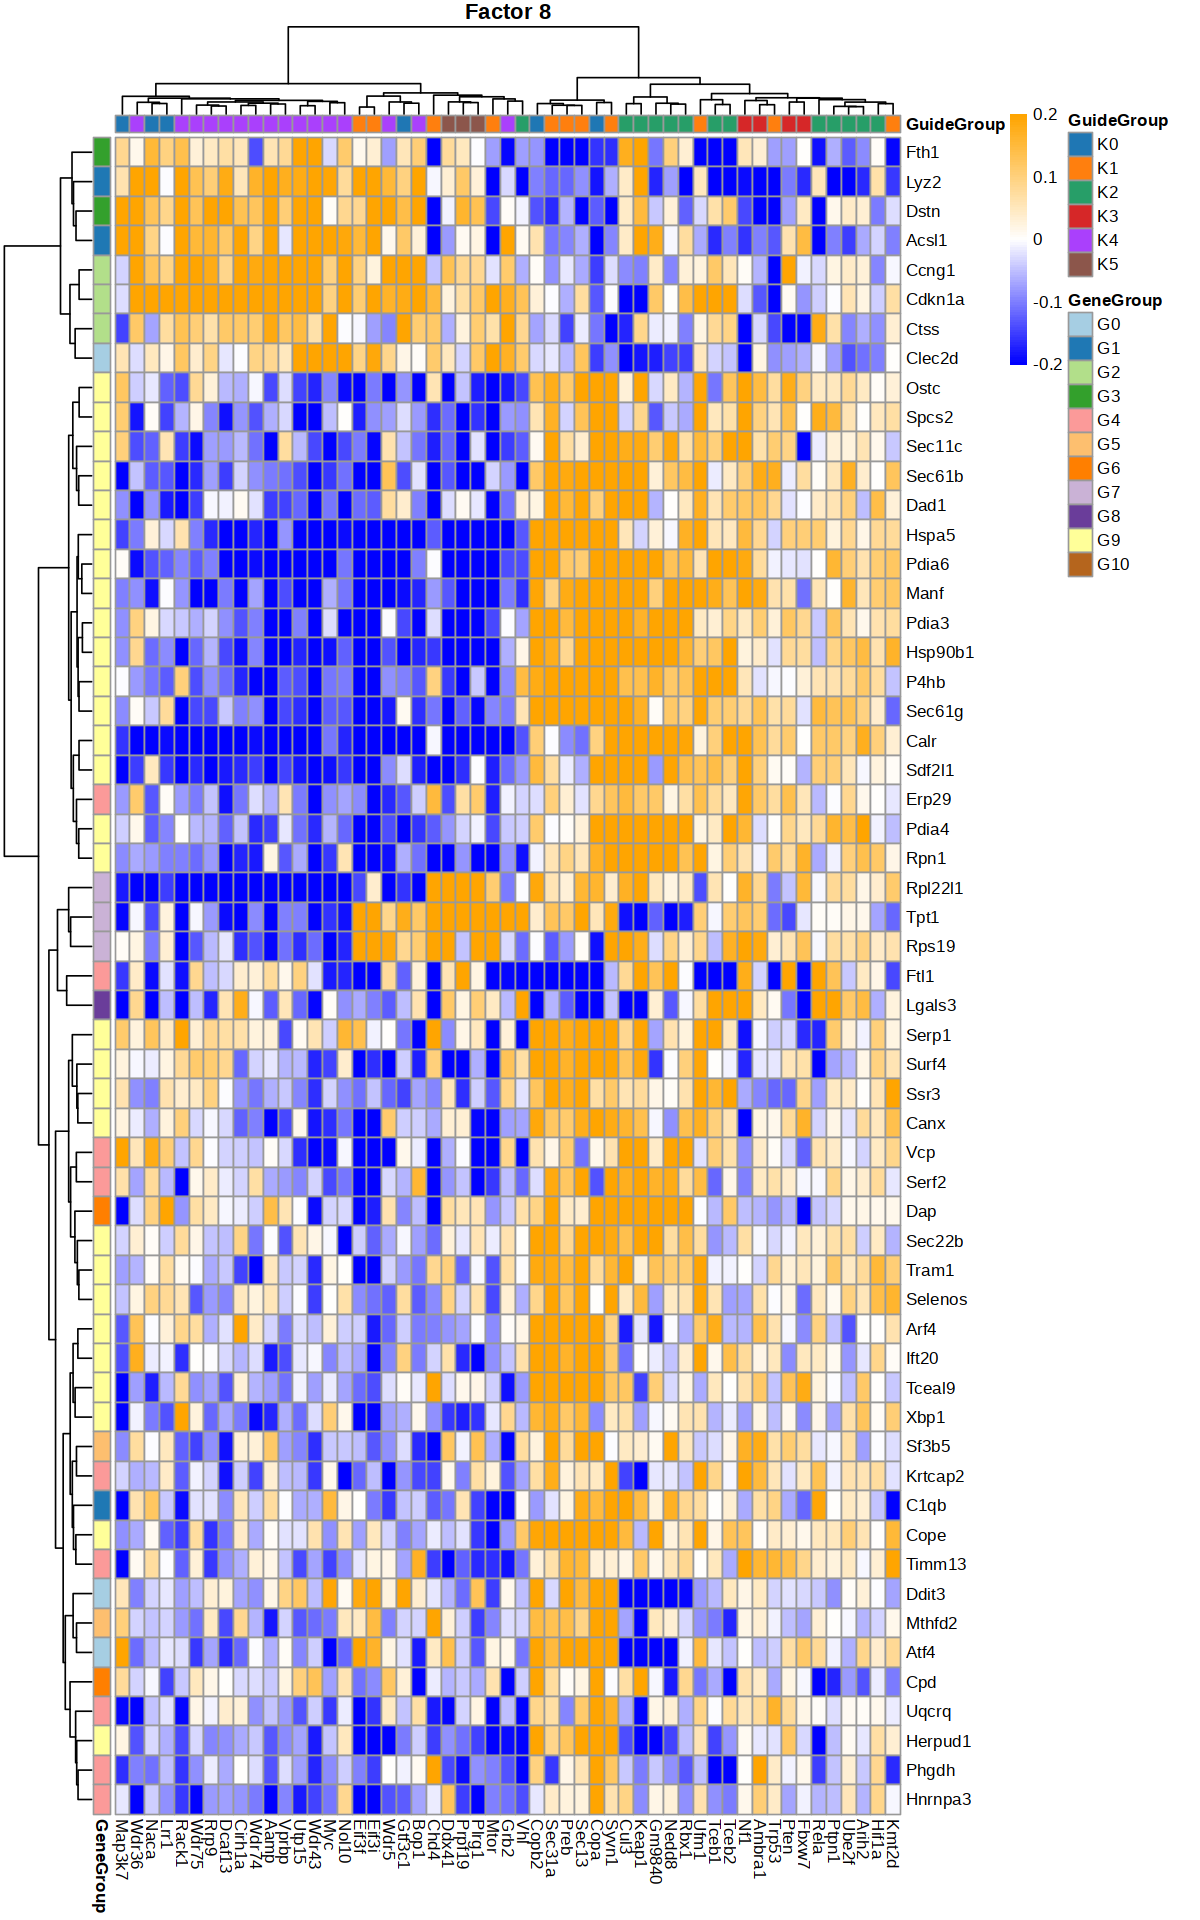

[1] "############## FACTOR : 10 ##################"


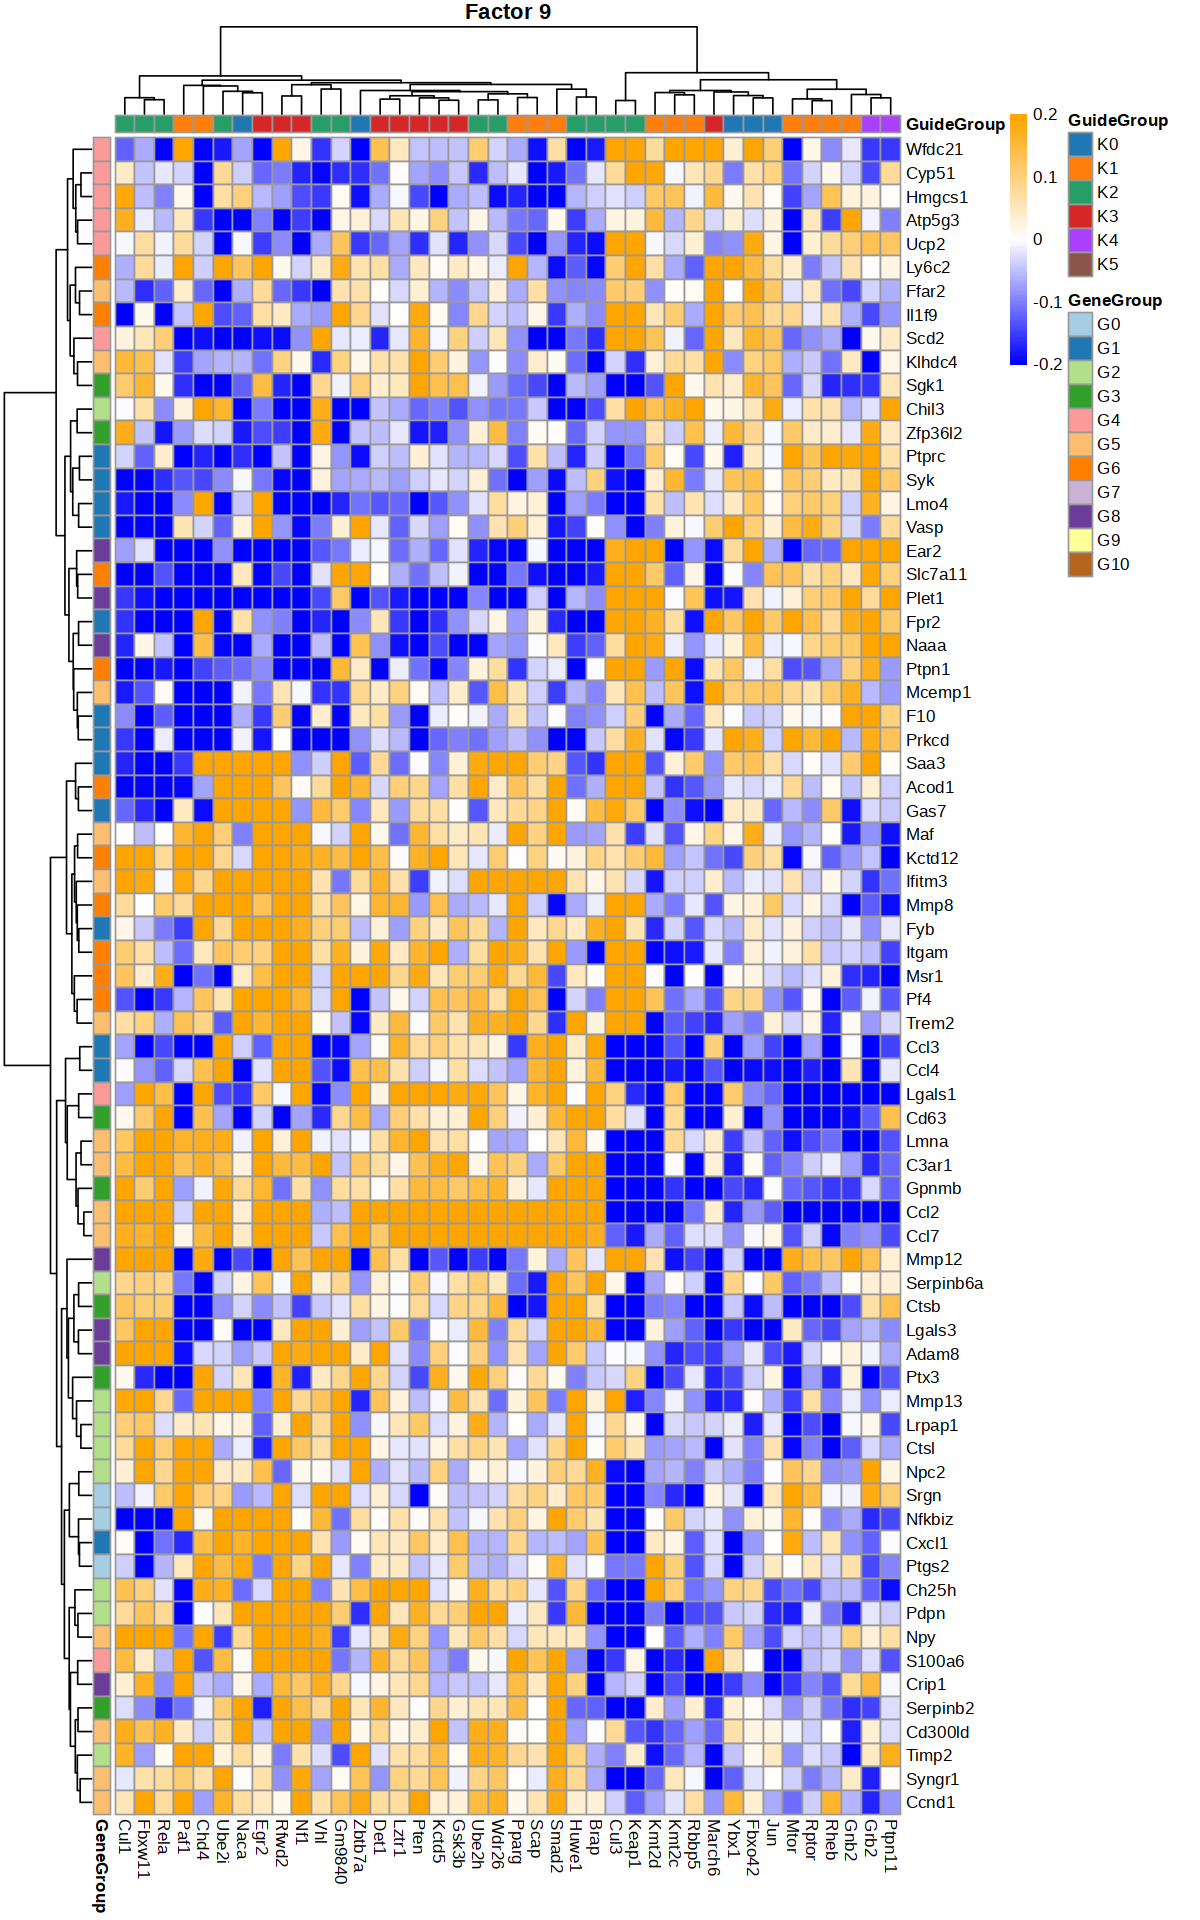

[1] "############## FACTOR : 11 ##################"


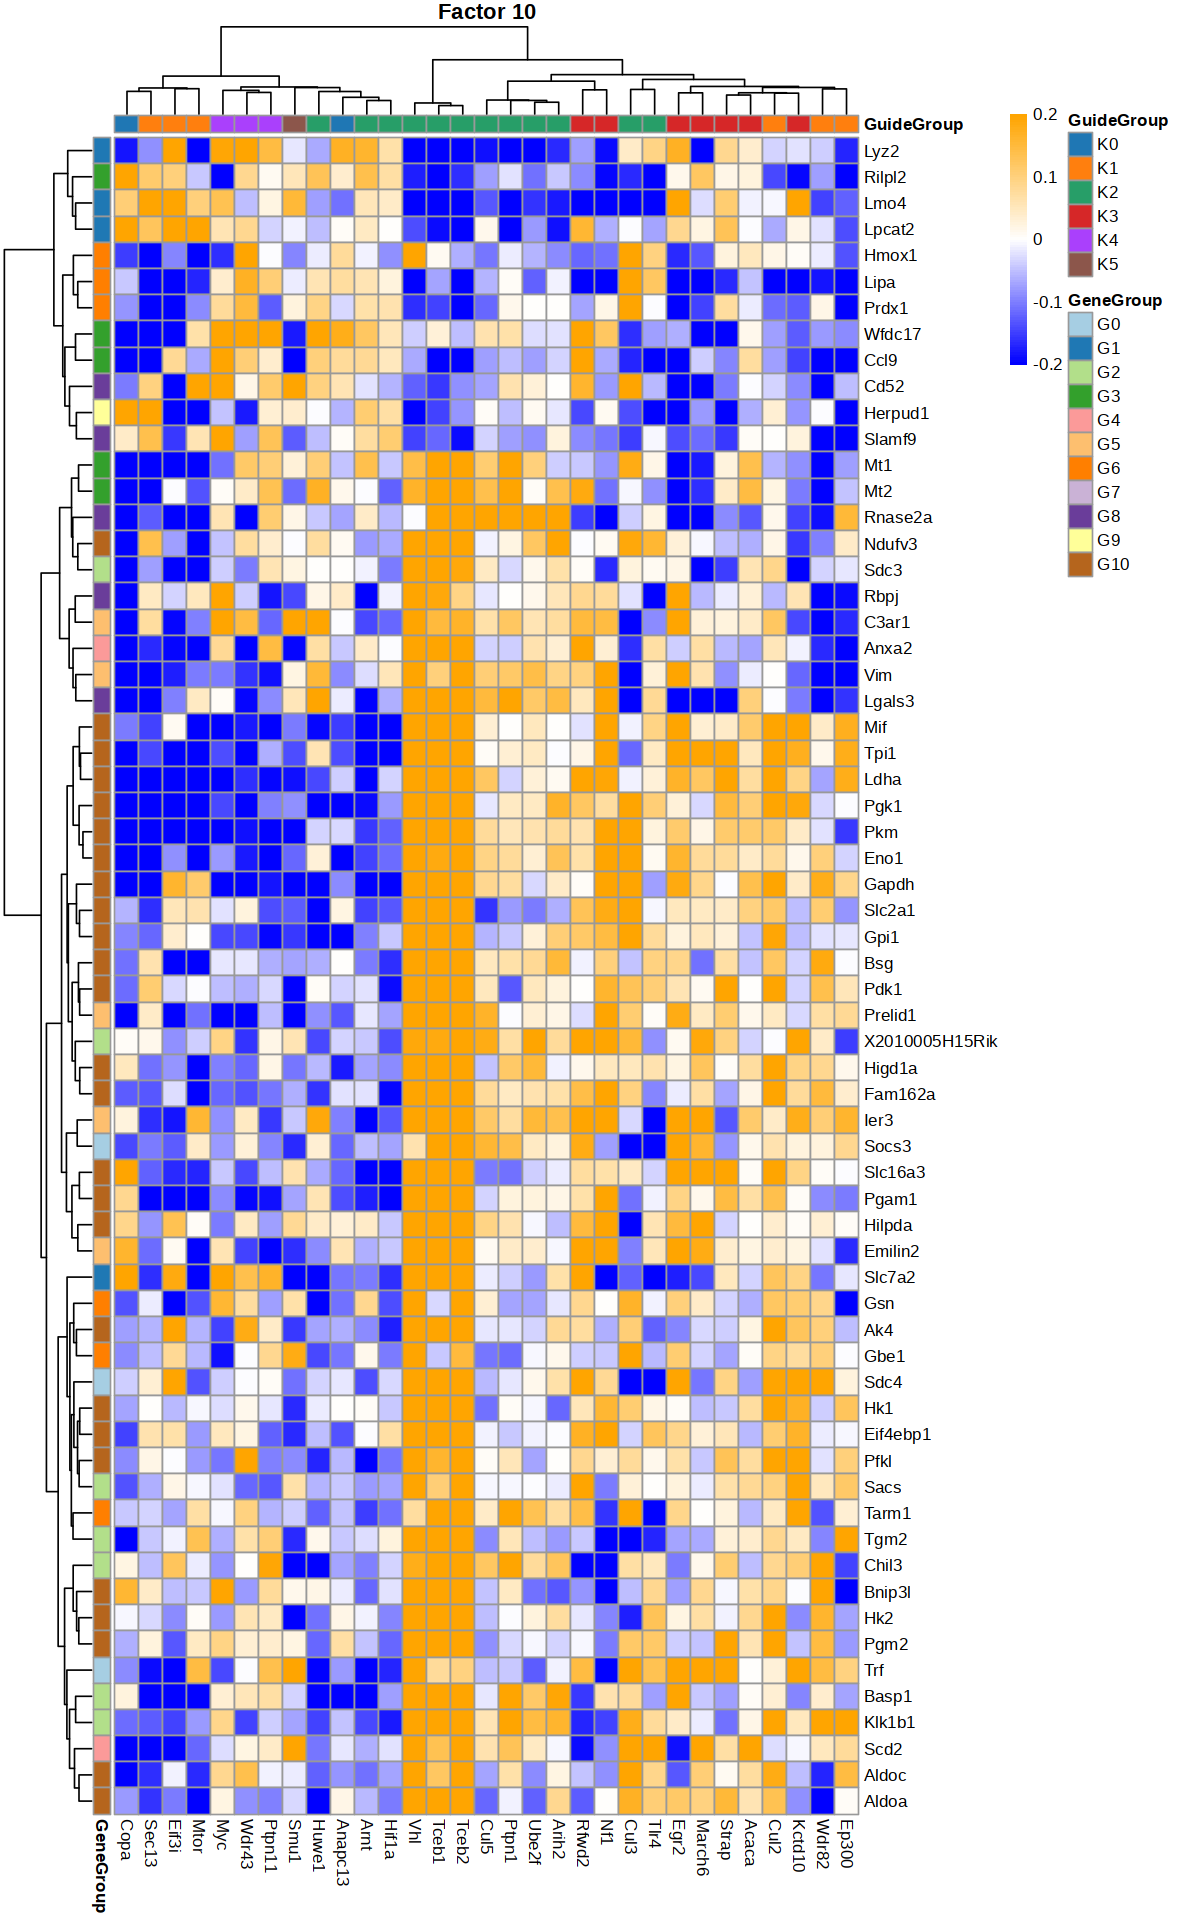

[1] "############## FACTOR : 12 ##################"


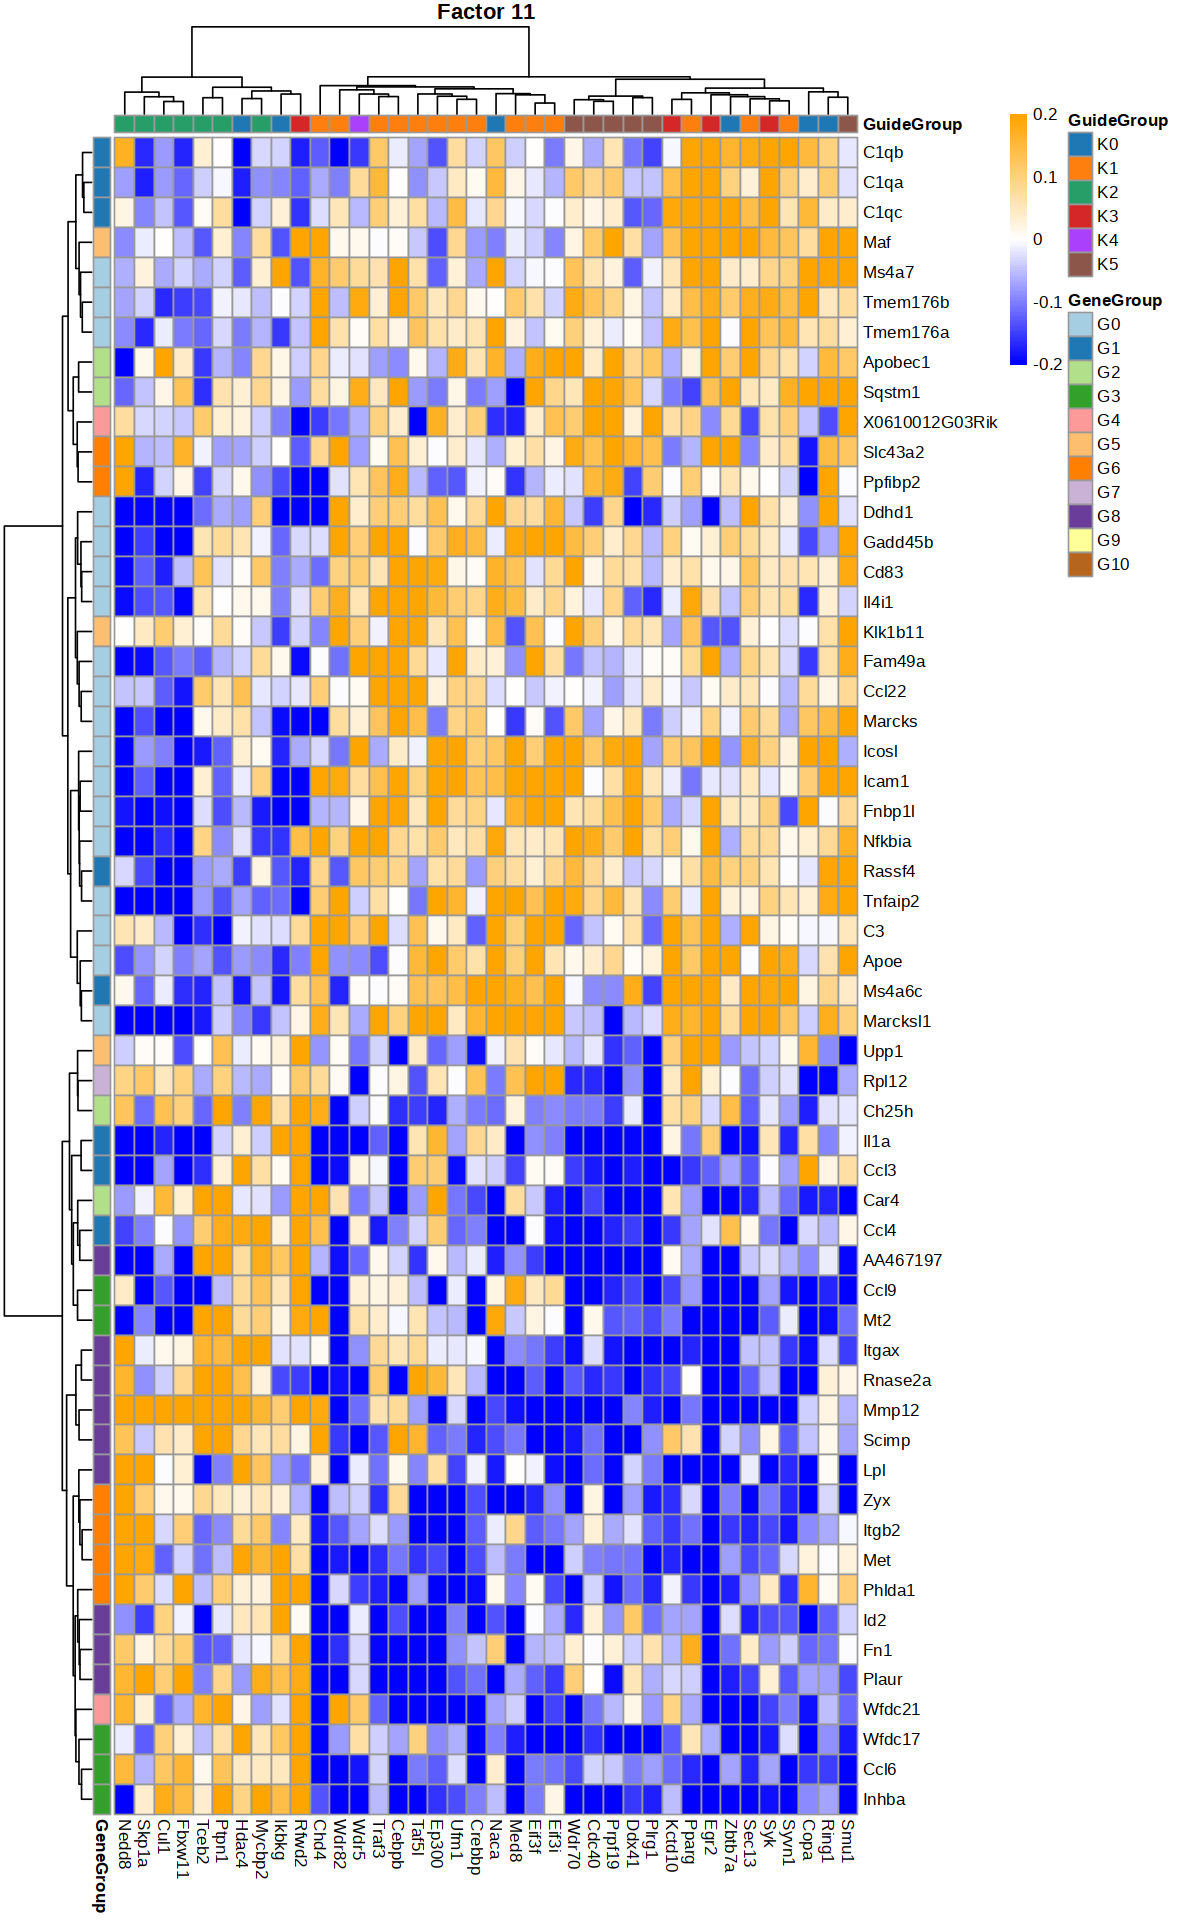

[1] "############## FACTOR : 13 ##################"


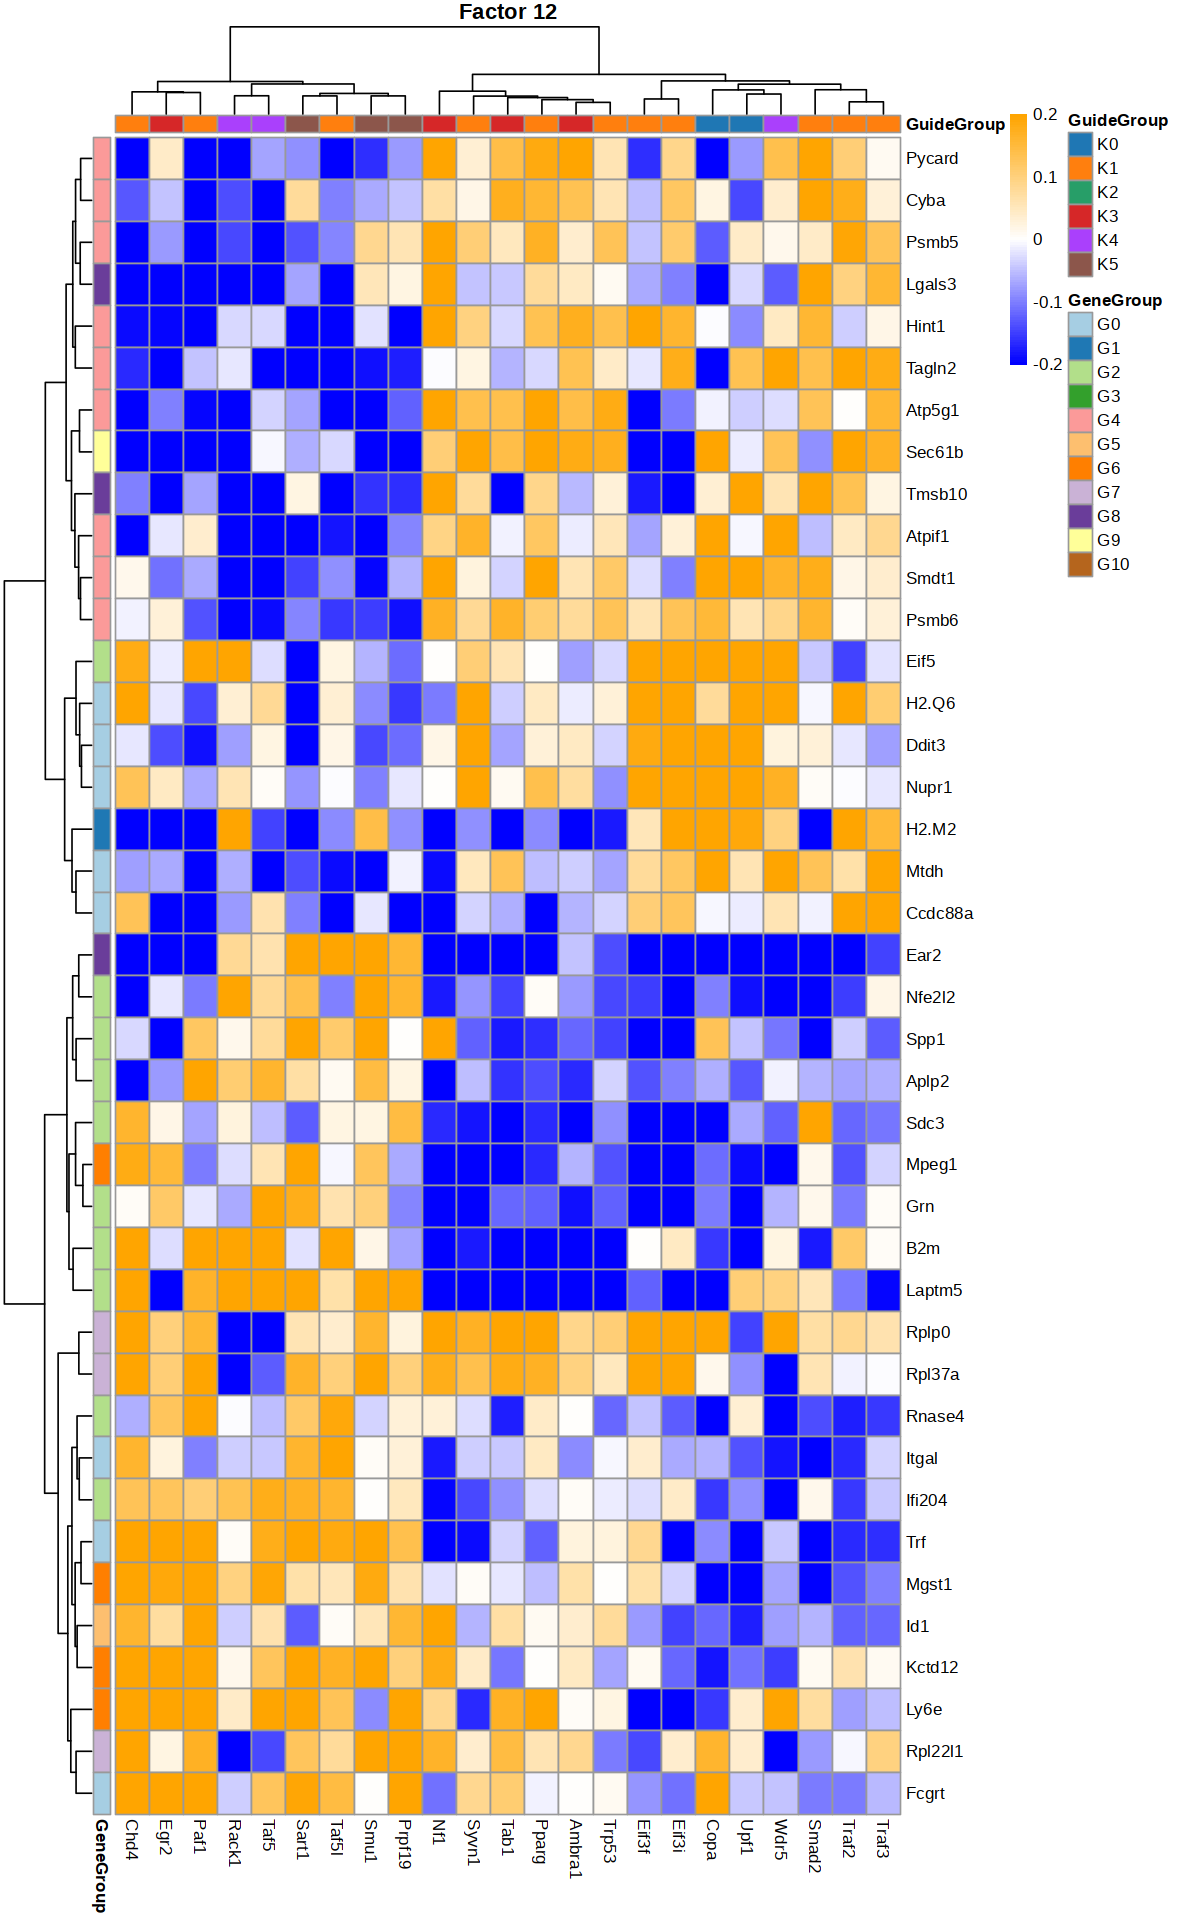

[1] "############## FACTOR : 14 ##################"


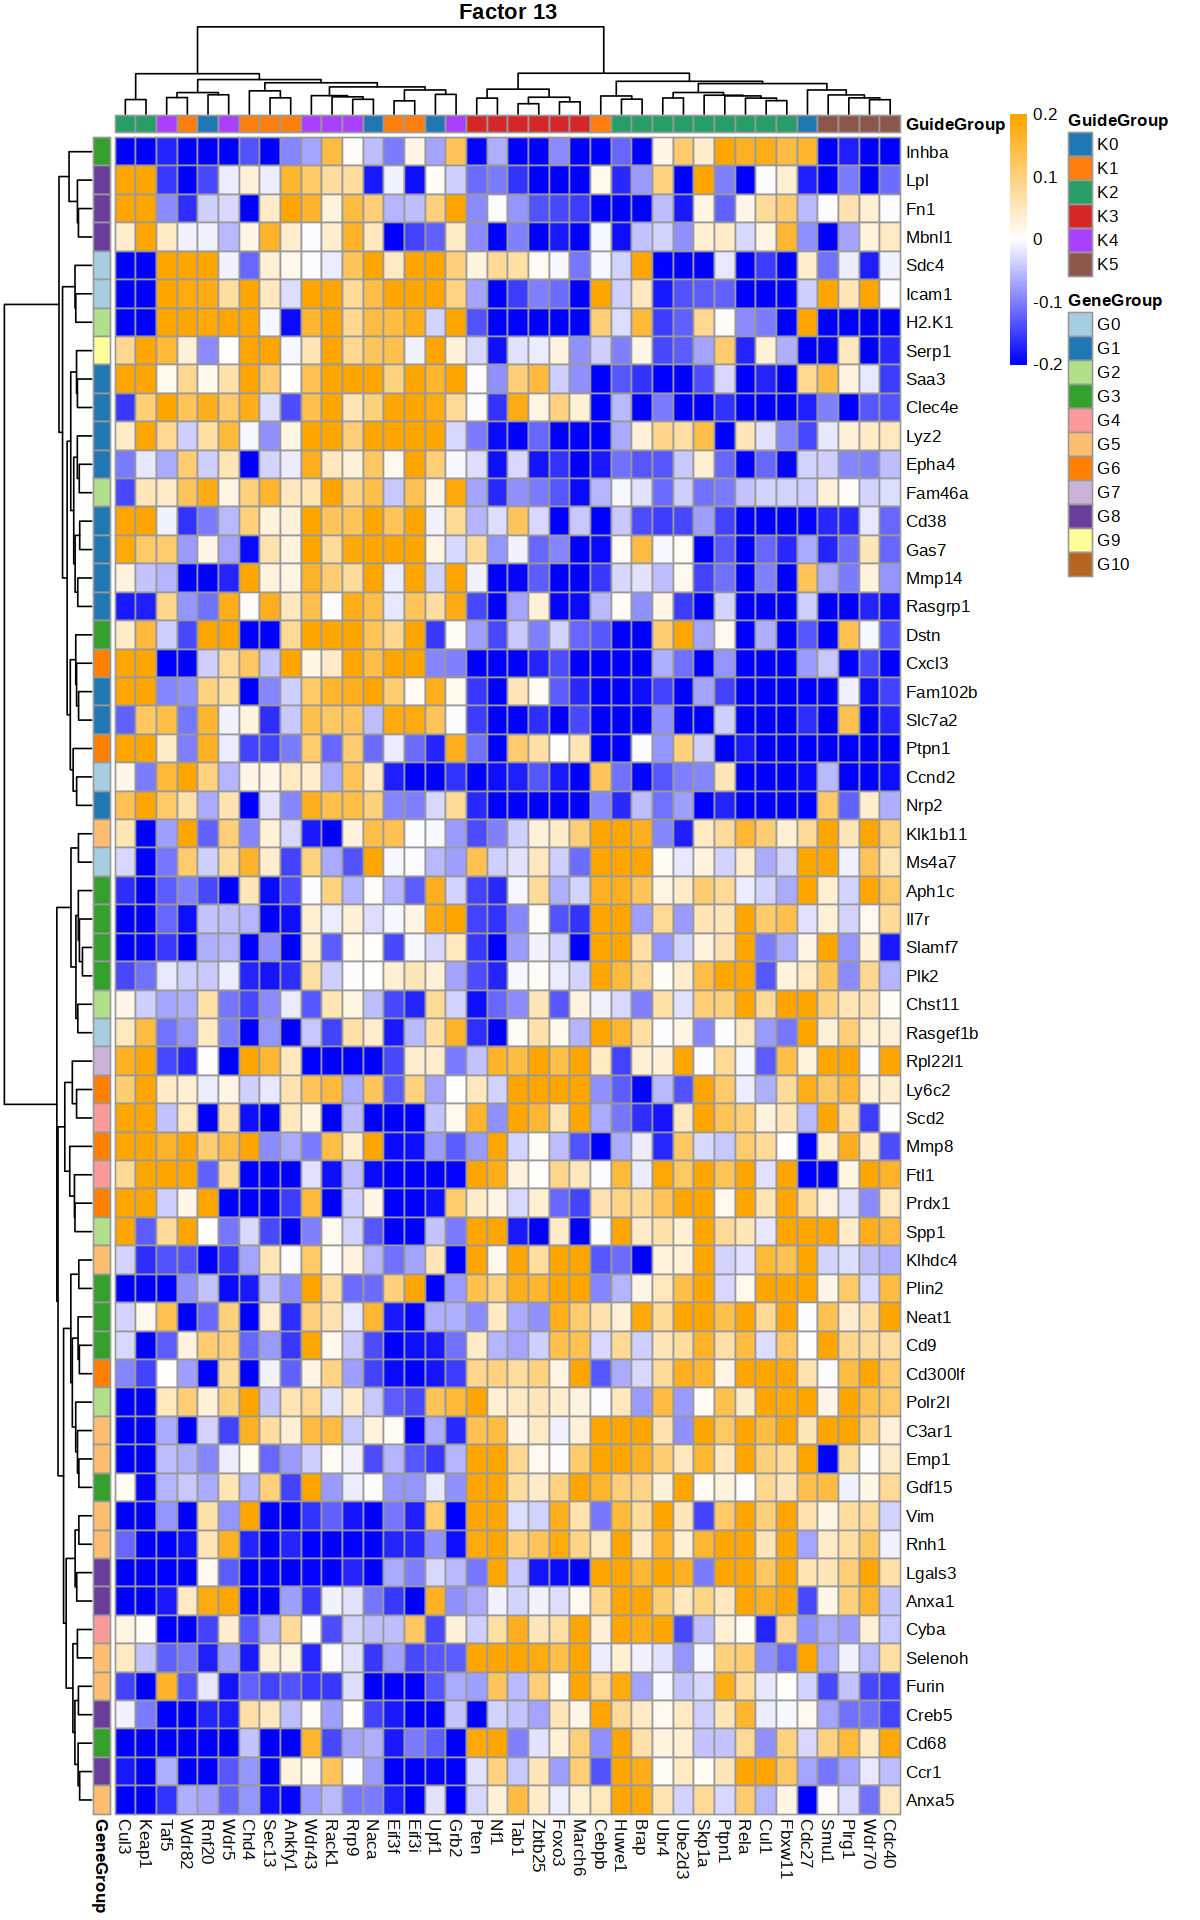

[1] "############## FACTOR : 15 ##################"


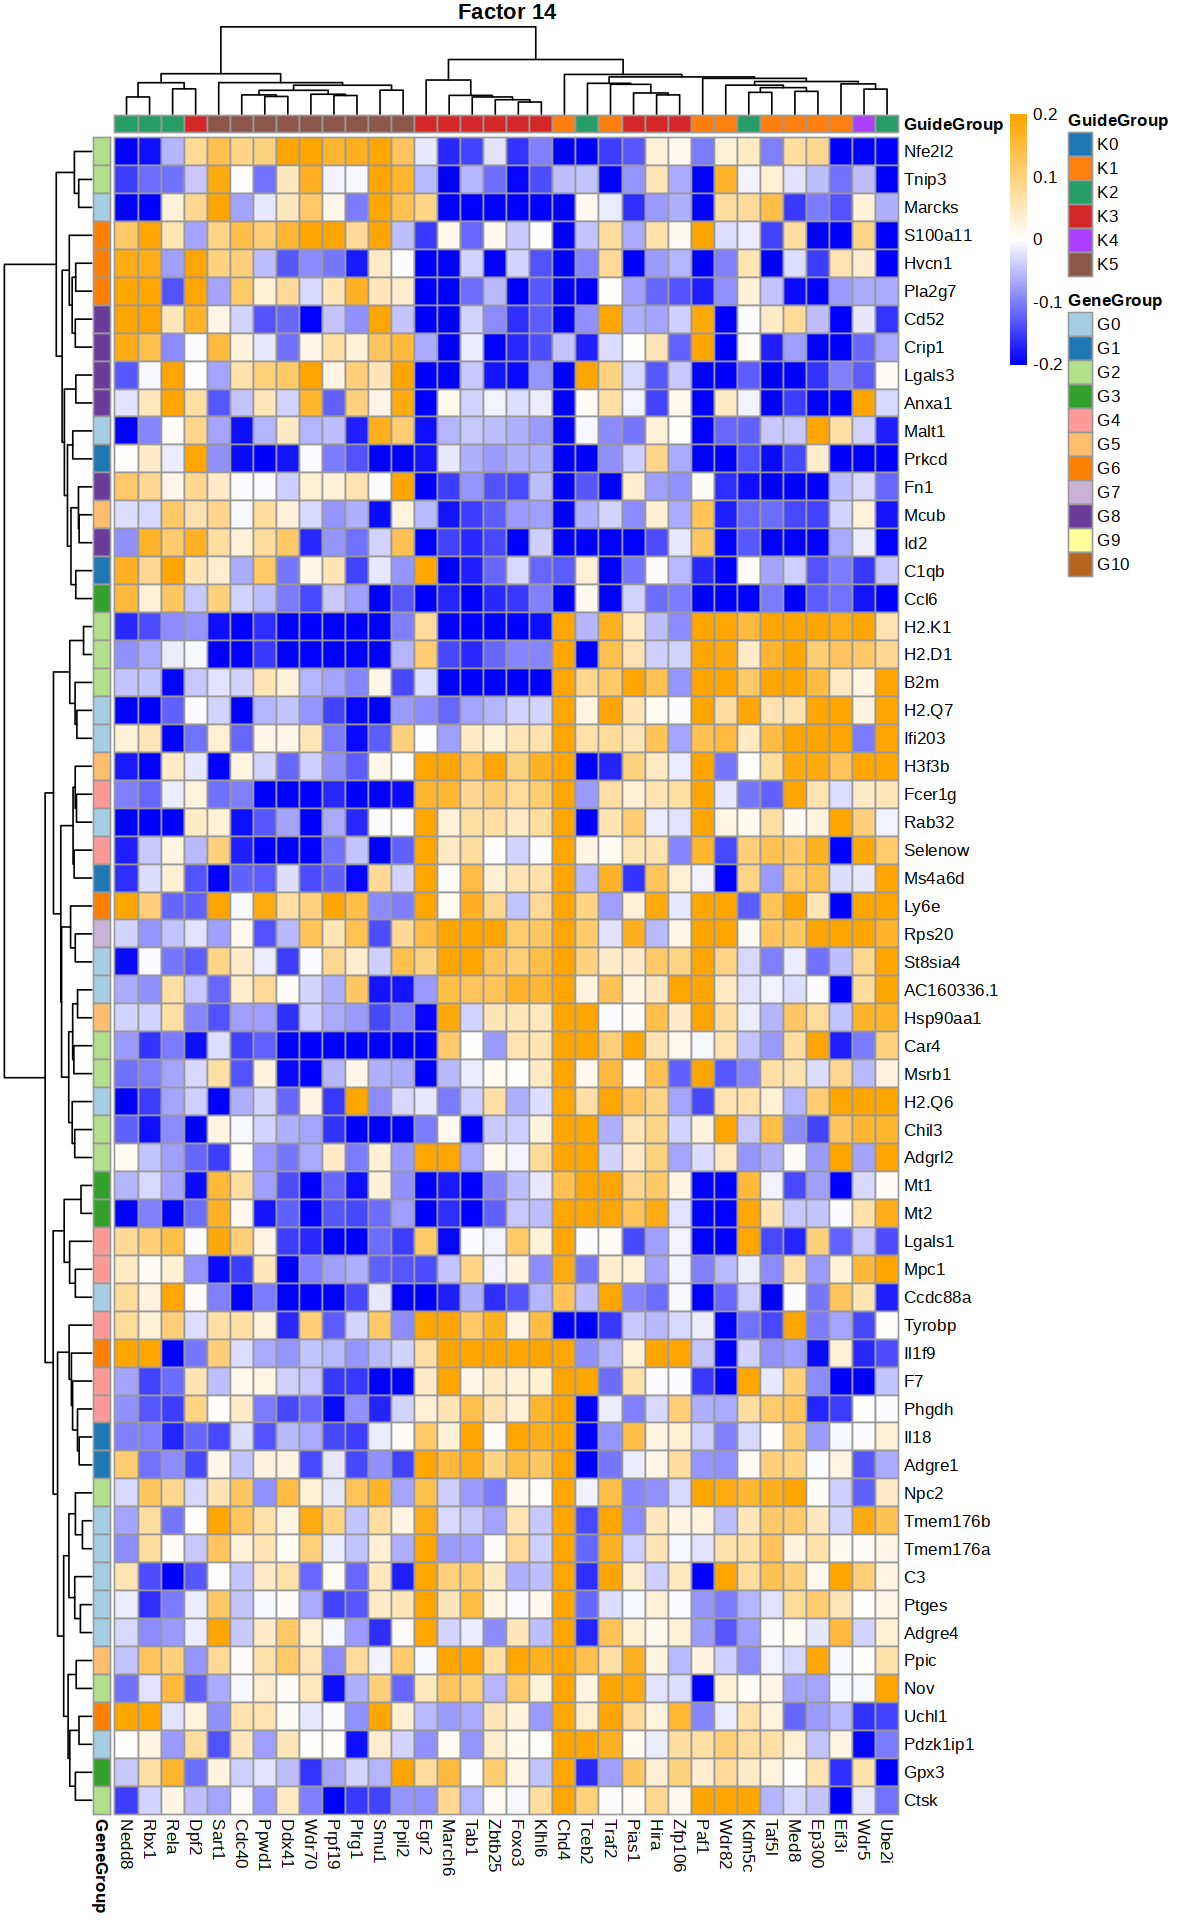

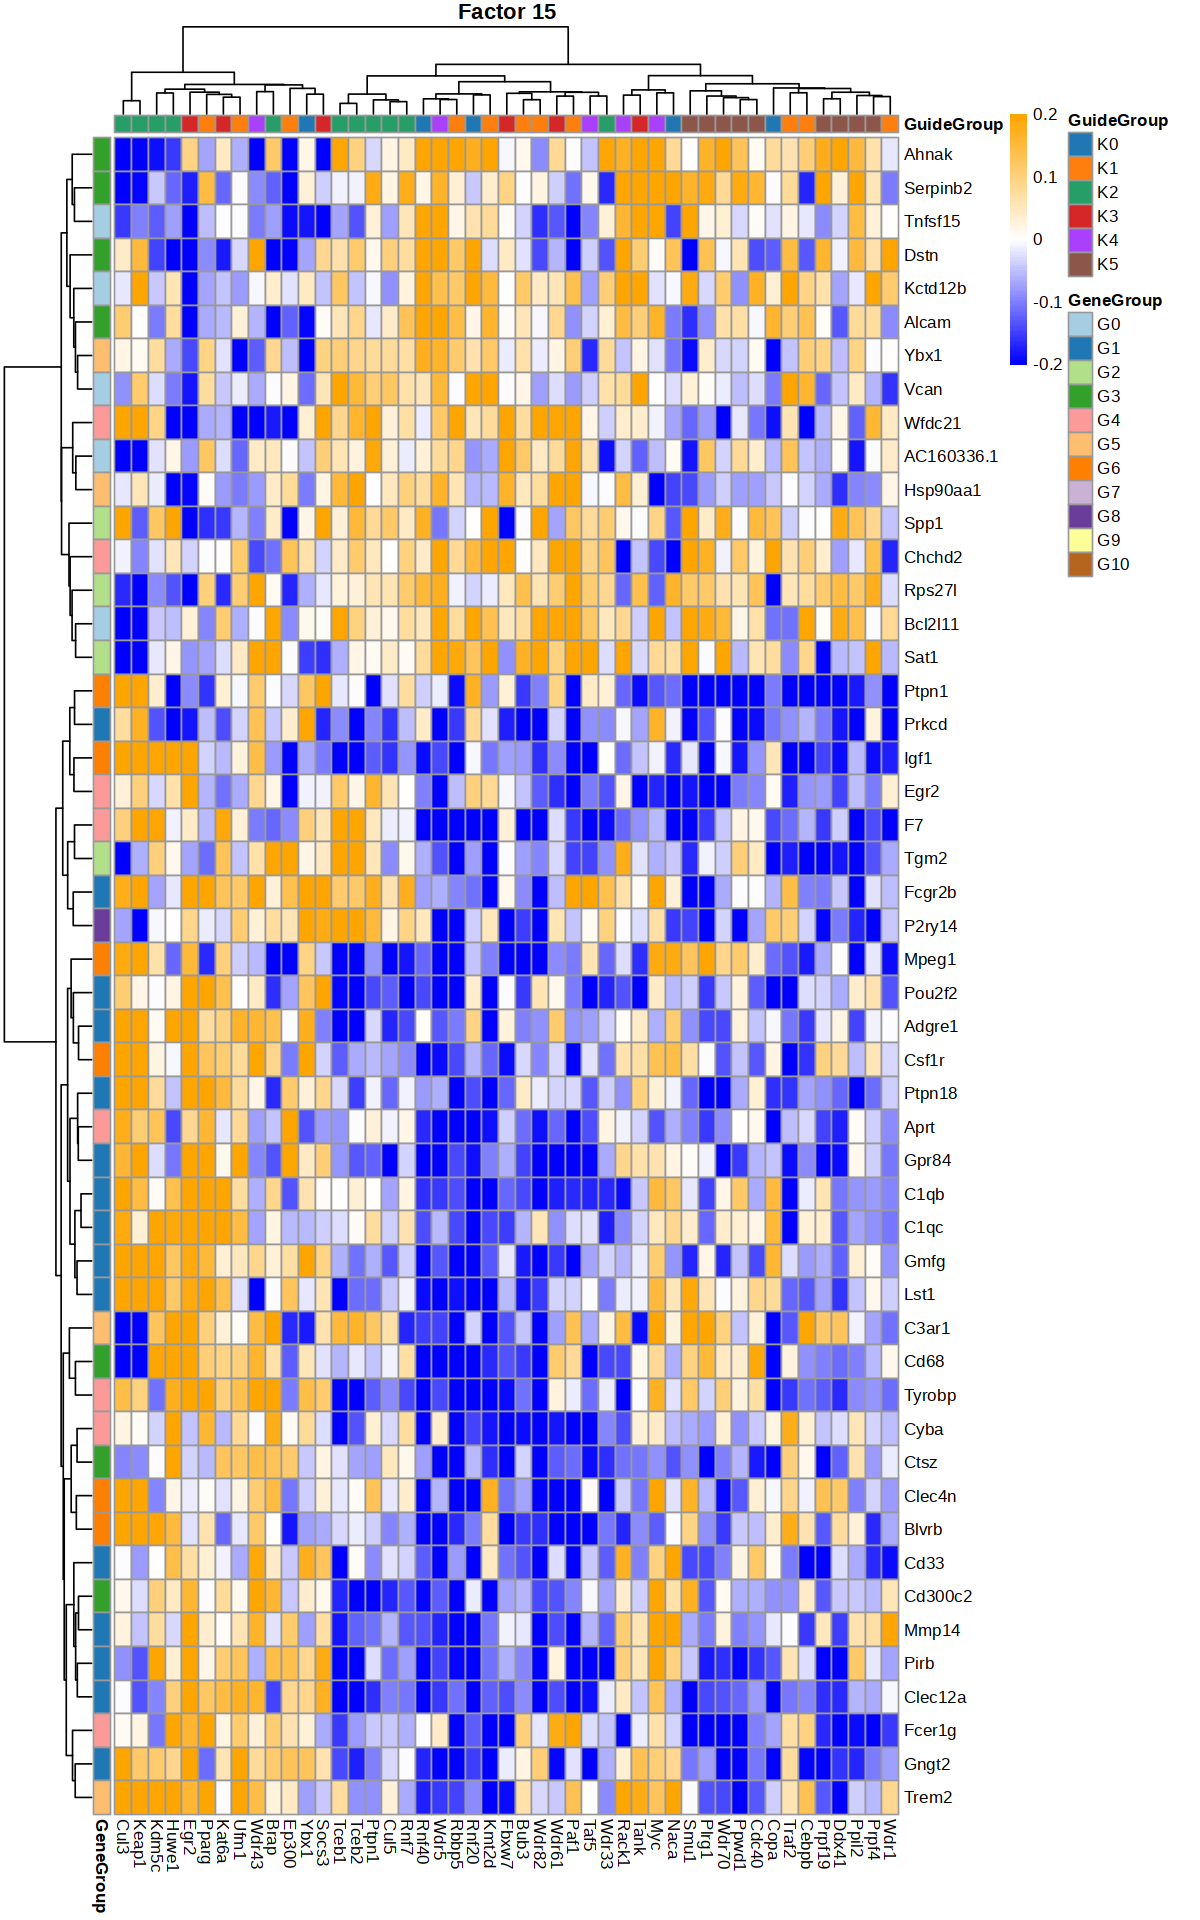

In [136]:
pathwayKOs <- list()
pathwayKOs_up <- list()
pathwayKOs_down <- list()


pathwayEffectedGenes <- list()
pathwayEffectedUpGenes <- list()
pathwayEffectedDownGenes <- list()
factorGeneGroups <- list()
geneKOOrder <- list()


for(elem in c(1:nFactors)){
  print(paste0("############## FACTOR : ",elem, " ##################"))
  
  factor0X <- myW[,elem]
  names(factor0X) <- rownames(myW)
  sKOGenes_up <- names(getOutliers_up(factor0X))
  sKOGenes_down <- names(getOutliers_down(factor0X))
    
  factor0Y <- unlist(myH[elem,])
  names(factor0Y) <- colnames(myH)
  sEffectGenes_up <- names(getOutliers2_up(factor0Y))
  sEffectGenes_down <- names(getOutliers2_down(factor0Y))

 
  k <- plotFactorHeatmap(selCoefs, c(sKOGenes_up, sKOGenes_down), c(sEffectGenes_up, sEffectGenes_down), elem)

  names(k) <- c(paste0("Factor ", elem, " gene group 1"), paste0("Factor ", elem, " gene group 2"),
                paste0("Factor ", elem, " guide group 1"),paste0("Factor ", elem, " guide group 2"),
                paste0("Factor ", elem, " gene order"), paste0("Factor ", elem, " guide order") )
  factorGeneGroups <- lappend(factorGeneGroups, k[1:4])
  geneKOOrder <- lappend(geneKOOrder, k[5:6])

  
  pathwayEffectedUpGenes <- lappend(pathwayEffectedUpGenes, sEffectGenes_up)
  pathwayEffectedDownGenes <- lappend(pathwayEffectedDownGenes, sEffectGenes_down)
  pathwayEffectedGenes <- lappend(pathwayEffectedGenes, c(sEffectGenes_up, sEffectGenes_down))
    
  pathwayKOs_up <- lappend(pathwayKOs_up, sKOGenes_up) 
  pathwayKOs_down <- lappend(pathwayKOs_down, sKOGenes_down) 
  pathwayKOs <- lappend(pathwayKOs, c(sKOGenes_up, sKOGenes_down))
    
}


In [137]:
# KOFactorMatrix = data.frame(matrix(0, ncol = length(unique(unlist(pathwayKOs_up))), nrow= nFactors))
# rownames(KOFactorMatrix) <- paste0("Factor ", 1:nrow(KOFactorMatrix))
# colnames(KOFactorMatrix) <- sort(unique(unlist(pathwayKOs_up)))

# for(i in 1:length(pathwayKOs_up)){
#     facKOGenes = pathwayKOs_up[[i]]
#     KOFactorMatrix[i,facKOGenes] = 1
# }

# options(repr.plot.width=6, repr.plot.height=26)

# pheatmap(t(KOFactorMatrix), border_color="black", color = c("white","darkred"),cluster_cols = F,
#          main = "KO genes that have \n outlier positive values per factor", fontsize_col = 20,treeheight_col = 0, treeheight_row = 0)

In [138]:
# KOFactorMatrix = data.frame(matrix(0, ncol = length(unique(unlist(pathwayKOs_down))), nrow= nFactors))
# rownames(KOFactorMatrix) <- paste0("Factor ", 1:nrow(KOFactorMatrix))
# colnames(KOFactorMatrix) <- sort(unique(unlist(pathwayKOs_down)))

# for(i in 1:length(pathwayKOs_down)){
#     facKOGenes = pathwayKOs_down[[i]]
#     KOFactorMatrix[i,facKOGenes] = 1
# }

# options(repr.plot.width=6, repr.plot.height=26)

# pheatmap(t(KOFactorMatrix), border_color="black", color = c("white","darkblue"),cluster_cols = F,
#          main = "KO genes that have \n outlier negative values per factor", fontsize_col = 20,treeheight_col = 0, treeheight_row = 0)

In [139]:
# EGenesFactorMatrix = data.frame(matrix(0, ncol = length(unique(unlist(pathwayEffectedUpGenes))), nrow= nFactors))
# rownames(EGenesFactorMatrix) <- paste0("Factor ", 1:nrow(EGenesFactorMatrix))
# colnames(EGenesFactorMatrix) <- sort(unique(unlist(pathwayEffectedUpGenes)))

# for(i in 1:length(pathwayEffectedUpGenes)){
#     facEffectedGenes = pathwayEffectedUpGenes[[i]]
#     EGenesFactorMatrix[i,facEffectedGenes] = 1
# }

# options(repr.plot.width=8, repr.plot.height=40)

# pheatmap(t(EGenesFactorMatrix), color = c("white","red"), cluster_cols = F, main = "Effected genes that have outlier positive values per factor", treeheight_row = 0)

In [140]:
# EGenesFactorMatrix = data.frame(matrix(0, ncol = length(unique(unlist(pathwayEffectedDownGenes))), nrow= nFactors))
# rownames(EGenesFactorMatrix) <- paste0("Factor ", 1:nrow(EGenesFactorMatrix))
# colnames(EGenesFactorMatrix) <- sort(unique(unlist(pathwayEffectedDownGenes)))

# for(i in 1:length(pathwayEffectedDownGenes)){
#     facEffectedGenes = pathwayEffectedDownGenes[[i]]
#     EGenesFactorMatrix[i,facEffectedGenes] = 1
# }

# options(repr.plot.width=8, repr.plot.height=45)

# pheatmap(t(EGenesFactorMatrix), color = c("white","blue"), cluster_cols = F, main = "Effected genes that have outlier negative values per factor", treeheight_row = 0)

In [141]:
names(pathwayEffectedUpGenes) = paste0("Factor_",1:15)
names(pathwayEffectedDownGenes) = paste0("Factor_",1:15)

In [142]:
str(pathwayEffectedDownGenes)

List of 15
 $ Factor_1 : chr [1:16] "Hspa5" "Ms4a7" "Sgk1" "Lhfpl2" ...
 $ Factor_2 : chr [1:73] "Mmp8" "Thbs1" "Acod1" "Slc7a11" ...
 $ Factor_3 : chr [1:38] "Stap1" "X2010005H15Rik" "Pid1" "Spata13" ...
 $ Factor_4 : chr [1:22] "Ccr5" "Ccr2" "Cotl1" "Ifi27l2a" ...
 $ Factor_5 : chr [1:54] "Bcl2a1d" "Bcl2a1b" "Cxcl2" "Gpr84" ...
 $ Factor_6 : chr [1:24] "Pid1" "Lgals1" "Ndufa4" "S100a8" ...
 $ Factor_7 : chr [1:11] "Eef1a1" "Ddit3" "Atf4" "Sgk1" ...
 $ Factor_8 : chr [1:45] "Rpl22l1" "Tceal9" "Arf4" "Ift20" ...
 $ Factor_9 : chr [1:45] "Ch25h" "S100a6" "Fyb" "Ifitm3" ...
 $ Factor_10: chr [1:53] "Chil3" "Ak4" "Bnip3l" "Pfkl" ...
 $ Factor_11: chr [1:26] "Rpl12" "Ch25h" "Car4" "Upp1" ...
 $ Factor_12: chr [1:20] "Rpl22l1" "Rpl37a" "Trf" "Fcgrt" ...
 $ Factor_13: chr [1:24] "Mmp8" "Cd38" "Cxcl3" "Fn1" ...
 $ Factor_14: chr [1:42] "Rps20" "Chil3" "Gpx3" "St8sia4" ...
 $ Factor_15: chr [1:34] "Fcer1g" "C1qb" "C1qc" "Aprt" ...


In [143]:
factorGeneGroups <- unlist(factorGeneGroups, recursive = F)
lLen <- unlist(lapply(factorGeneGroups, length))
factorGeneGroups <- factorGeneGroups[lLen!=0]

In [144]:
pathwayEffectedUpGenes

$Factor_1
  [1] "Eef1a1"   "Tpt1"     "Rps27"    "Rplp0"    "Eif3f"    "Eif3e"   
  [7] "Eif3k"    "Eif1"     "Rpl3"     "Rpl14"    "Rpl10a"   "Rps6"    
 [13] "Rps27a"   "Rpl8"     "Rpl32"    "Rpl13"    "Rps8"     "Rps18"   
 [19] "Rpl11"    "Rps17"    "Eef1g"    "Rpl12"    "Rps2"     "Rps12"   
 [25] "Rplp1"    "Rpl13a"   "Naca"     "Npm1"     "Btf3"     "Rpl38"   
 [31] "Rpl7a"    "Rack1"    "Rpl35"    "Rpl31"    "Rpl36"    "Rpl22l1" 
 [37] "Rplp2"    "Rpsa"     "Rps19"    "Rps16"    "Rps25"    "Rpl41"   
 [43] "Rps29"    "Rps9"     "Rps28"    "Eef1b2"   "Rpl24"    "Rpl37a"  
 [49] "Rps15"    "Rps26"    "Eef2"     "Rpl10"    "Rpl23a"   "Rps21"   
 [55] "Rpl39"    "Rps4x"    "Rpl36a"   "Rpl26"    "Rpl17"    "Rps24"   
 [61] "Rpl23"    "Rpl5"     "Rps7"     "Rpl7"     "Rps14"    "Rps20"   
 [67] "Fau"      "Rps13"    "Rpl34"    "Rps3"     "Rpl27a"   "Rps23"   
 [73] "Rps11"    "Rpl21"    "Rpl18"    "Rpl15"    "Rpl9"     "Rpl29"   
 [79] "Rpl6"     "Rps15a"   "Rpl22"    "Rpl4"     "Rpl30"    "Rpl35a"  
 [85] "Rps5"     "Rpl18a"   "Rps3a1"   "Rps10"    "Rpl37"    "Rpl28"   
 [91] "Rpl19"    "Gapdh"    "Cox7a2l"  "Aprt"     "Hspa8"    "Atp5e"   
 [97] "Hsp90ab1" "Cdh1"     "Uqcrh"    "Cox4i1"   "Ncl"      "Ssr4"    
[103] "Pabpc1"  

$Factor_2
 [1] "Ccr5"  "H3f3b" "Tlr2"  "Sdc4"  "Lmo4"  "Ddit3" "Nupr1" "Mcl1"  "Npy"  
[10] "Inhba" "Btg1" 

$Factor_3
 [1] "Lgals1"   "Naaa"     "Plet1"    "Creg1"    "Cd36"     "Lipa"    
 [7] "Icam1"    "Fabp5"    "Ftl1"     "Lgals3"   "Rab3il1"  "Ctsz"    
[13] "Mt1"      "Sdc3"     "Cd63"     "Lgmn"     "Vat1"     "Myof"    
[19] "Psap"     "Gpnmb"    "Dnmt3a"   "Pld3"     "Atp6v0d2" "Ctsb"    
[25] "Mgll"     "S100a1"   "Slamf7"   "Plk2"     "Fam46c"   "Ccdc88a" 
[31] "Rnase2a"  "Acp5"     "Ddhd1"   

$Factor_4
 [1] "Ubb"      "Sdc4"     "Marcksl1" "Malat1"   "Ddit3"    "Bri3"    
 [7] "Klk1b1"   "Mgll"     "Wfdc17"   "Gbp5"     "Gbp2"     "Mndal"   
[13] "Ddhd1"    "H2.K1"    "H2.D1"    "Cdkn1a"   "Cd274"   

$Factor_5
 [1] "Mafb"     "Malat1"   "Klf4"     "Abcg1"    "Gda"      "Cd300lf" 
 [7] "Cd200r1"  "Socs6"    "Nabp1"    "Laptm5"   "Txnip"    "Hist1h1c"
[13] "Cdkn1a"  

$Factor_6
 [1] "Ccr2"     "Zfp36l1"  "Cst3"     "Plet1"    "Itgax"    "Dcstamp" 
 [7] "Mmp12"    "Cd52"     "Clec4n"   "Ccl22"    "Stat5a"   "Cd40"    
[13] "Srgn"     "Il4i1"    "Mgl2"     "Sema4a"   "Grk3"     "Vcan"    
[19] "Scimp"    "Ahr"      "Slamf9"   "Gbp5"     "Gbp2"     "Cxcl16"  
[25] "Jak2"     "Etv3"     "Bhlhe40"  "Ccl17"    "Irf4"     "Pfkp"    
[31] "Nectin2"  "Gm2a"     "Axl"      "Cd74"     "H2.Ab1"   "H2.Aa"   
[37] "AA467197" "Jund"     "Clic4"    "Btg1"    

$Factor_7
 [1] "S100a6"  "Bcl2a1b" "Fcer1g"  "H3f3a"   "S100a4"  "Cox8a"   "Cotl1"  
 [8] "Atp5j2"  "Serf2"   "Atp5g1"  "Nme1"    "Calm1"   "Cfl1"    "H2afz"  
[15] "Dbi"     "S100a10" "Nedd8"   "Atp5j"   "Ly6e"    "Sdc4"    "Pnp"    
[22] "Actb"    "Gpx1"   

$Factor_8
 [1] "Tpt1"   "Rps19"  "Ftl1"   "Lgals3" "Dstn"   "Lyz2"   "Fth1"   "Ctss"  
 [9] "Acsl1"  "Ccng1"  "Clec2d" "Cdkn1a"

$Factor_9
 [1] "Chil3"   "Klhdc4"  "Atp5g3"  "Mcemp1"  "Ffar2"   "Ly6c2"   "Slc7a11"
 [8] "Fpr2"    "Ear2"    "Naaa"    "Ucp2"    "Plet1"   "Il1f9"   "Scd2"   
[15] "Ptpn1"   "Lmo4"    "F10"     "Vasp"    "Sgk1"    "Zfp36l2" "Cyp51"  
[22] "Hmgcs1"  "Wfdc21"  "Prkcd"   "Ptprc"   "Syk"    

$Factor_10
 [1] "Herpud1" "Lipa"    "Cd52"    "Prdx1"   "Lmo4"    "Lpcat2"  "Rilpl2" 
 [8] "Slamf9"  "Lyz2"    "Wfdc17"  "Ccl9"   

$Factor_11
 [1] "X0610012G03Rik" "Klk1b11"        "Ms4a6c"         "Maf"           
 [5] "Apoe"           "Tmem176b"       "Tmem176a"       "C1qa"          
 [9] "C1qb"           "C1qc"           "Rassf4"         "Slc43a2"       
[13] "Ppfibp2"        "Icam1"          "Tnfaip2"        "Nfkbia"        
[17] "Marcksl1"       "Icosl"          "Ms4a7"          "Fam49a"        
[21] "Ccl22"          "Gadd45b"        "Cd83"           "Il4i1"         
[25] "Fnbp1l"         "C3"             "Apobec1"        "Sqstm1"        
[29] "Marcks"         "Ddhd1"   

In [145]:
# writePathwayFile(pathwayGenes=factorGeneGroups,
#                  fileName="/home/beraslan/jovian-work/analysisSingle/ICA_15_factors_effectedGenes_paper_lowerThreshold.csv",
#                  cNames= names(factorGeneGroups))

In [146]:
# writePathwayFile(pathwayGenes=pathwayEffectedUpGenes,
#                  fileName="/home/beraslan/jovian-work/analysisSingle/Factors_affectedGenesWithPositiveLoadings_lowerThreshold.csv",
#                  cNames= names(pathwayEffectedUpGenes))

In [147]:
# writePathwayFile(pathwayGenes=pathwayEffectedDownGenes,
#                  fileName="/home/beraslan/jovian-work/analysisSingle/Factors_affectedGenesWithNegativeLoadings_lowerThreshold.csv",
#                  cNames= names(pathwayEffectedDownGenes))

In [148]:
myICAFactors = data.frame(read.csv("./../TextFiles/ICA_15_factors_effectedGenes_paper.csv",
                                   stringsAsFactors=FALSE), 
                          stringsAsFactors=FALSE)
myICAFactors_guides = myICAFactors[,grep("guide", colnames(myICAFactors))]
myICAFactors_genes = myICAFactors[,grep("gene", colnames(myICAFactors))]


In [149]:
icaGuides = unique(unlist(myICAFactors_guides))
icaGuides = icaGuides[icaGuides != ' ']
KOFactorMatrix = data.frame(matrix(0, nrow = length(icaGuides), ncol= nFactors))
colnames(KOFactorMatrix) <- paste0("Factor ", 1:ncol(KOFactorMatrix))
rownames(KOFactorMatrix) <- sort(icaGuides)

factorNames = paste0("Factor ", sapply(colnames(myICAFactors_guides), 
                                       function(x){return(strsplit(x,"\\.")[[1]][2])} ))


for(i in 1:ncol(myICAFactors_guides)){
    facKOGenes = myICAFactors_guides[,i]
    facKOGenes = facKOGenes[facKOGenes != " "]
    KOFactorMatrix[facKOGenes,factorNames[i]] = 1
}

KOFactorMatrix = KOFactorMatrix[order(-KOFactorMatrix[,1],-KOFactorMatrix[,2], -KOFactorMatrix[,3], -KOFactorMatrix[,4], -KOFactorMatrix[,5],
                     -KOFactorMatrix[,6],-KOFactorMatrix[,7], -KOFactorMatrix[,8], -KOFactorMatrix[,9], -KOFactorMatrix[,10],
                     -KOFactorMatrix[,11],-KOFactorMatrix[,12], -KOFactorMatrix[,13], -KOFactorMatrix[,14], -KOFactorMatrix[,15]
                   ),]

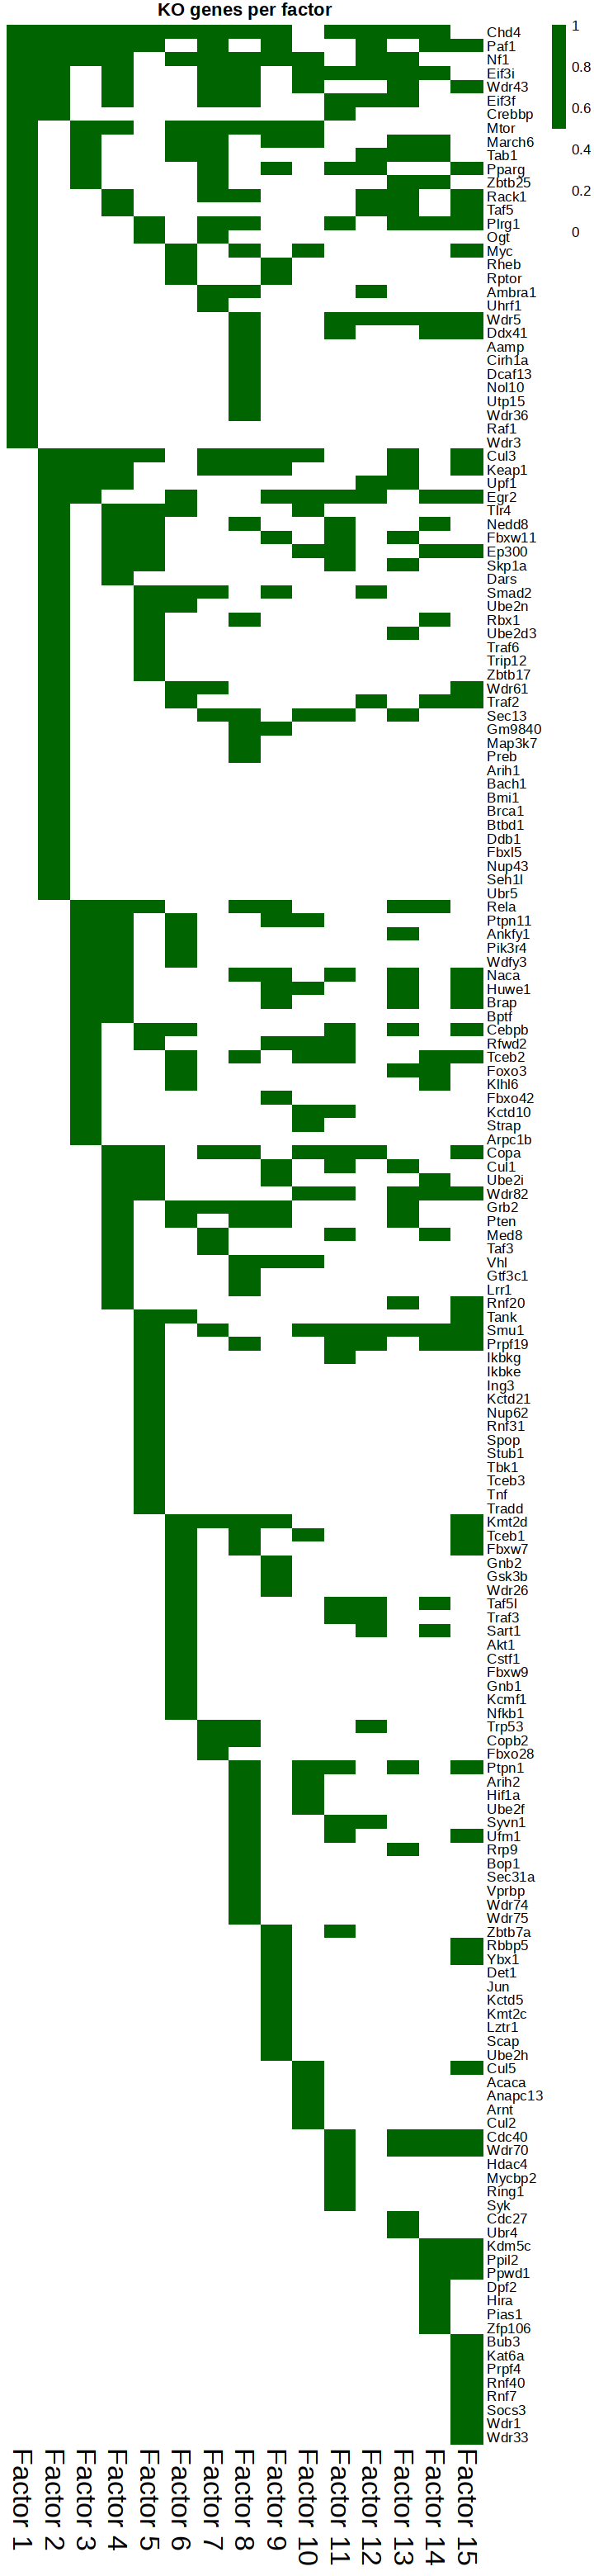

In [150]:
options(repr.plot.width=6, repr.plot.height=26)

kk = pheatmap(KOFactorMatrix, border_color="black", color = c("white","darkgreen"),cluster_cols = F,cluster_rows = F,method="ward.D2",
         main = "KO genes per factor", fontsize_col = 20,treeheight_col = 0, treeheight_row = 0)

#save_pheatmap_pdf(kk, "Figure_S4A.pdf", width=6, height=26)

In [151]:
jaccGenDist_1 = data.frame(matrix(0, nrow = nFactors, ncol = nFactors))
colnames(jaccGenDist_1) <- colnames(KOFactorMatrix)
rownames(jaccGenDist_1) <- colnames(KOFactorMatrix)

for(i in 1:nFactors){
  for(j in 1:nFactors){
    jaccGenDist_1[i,j] = jaccardSets(rownames(KOFactorMatrix)[KOFactorMatrix[,paste0("Factor ",i)] ==  1],
                                   rownames(KOFactorMatrix)[KOFactorMatrix[,paste0("Factor ",j)] ==  1])
  }
}

diag(jaccGenDist_1) <- NA


In [152]:
jaccGenDist_1

Factor 1   Factor 2  Factor 3  Factor 4  Factor 5   Factor 6  
Factor 1          NA 0.1093750 0.1509434 0.1475410 0.06060606 0.12698413
Factor 2  0.10937500        NA 0.1111111 0.2343750 0.23437500 0.11111111
Factor 3  0.15094340 0.1111111        NA 0.3018868 0.09523810 0.25000000
Factor 4  0.14754098 0.2343750 0.3018868        NA 0.20000000 0.14492754
Factor 5  0.06060606 0.2343750 0.0952381 0.2000000         NA 0.08219178
Factor 6  0.12698413 0.1111111 0.2500000 0.1449275 0.08219178         NA
Factor 7  0.35555556 0.1864407 0.2000000 0.2545455 0.13114754 0.14754098
Factor 8  0.27272727 0.1625000 0.1066667 0.2432432 0.09523810 0.12048193
Factor 9  0.12698413 0.1267606 0.2962963 0.2741935 0.12857143 0.23076923
Factor 10 0.10714286 0.1269841 0.2200000 0.2068966 0.11111111 0.14516129
Factor 11 0.13114754 0.1470588 0.1333333 0.1846154 0.22222222 0.08333333
Factor 12 0.25581395 0.1666667 0.1521739 0.1698113 0.10714286 0.16666667
Factor 13 0.21052632 0.1818182 0.2830189 0.4000000 0.16666667 0.13043478
Factor 14 0.16071429 0.1212121 0.1851852 0.1406250 0.17741935 0.15625000
Factor 15 0.13043478 0.1012658 0.1492537 0.1780822 0.13157895 0.12987013
          Factor 7  Factor 8  Factor 9   Factor 10 Factor 11  Factor 12
Factor 1  0.3555556 0.2727273 0.12698413 0.1071429 0.13114754 0.2558140
Factor 2  0.1864407 0.1625000 0.12676056 0.1269841 0.14705882 0.1666667
Factor 3  0.2000000 0.1066667 0.29629630 0.2200000 0.13333333 0.1521739
Factor 4  0.2545455 0.2432432 0.27419355 0.2068966 0.18461538 0.1698113
Factor 5  0.1311475 0.0952381 0.12857143 0.1111111 0.22222222 0.1071429
Factor 6  0.1475410 0.1204819 0.23076923 0.1451613 0.08333333 0.1666667
Factor 7         NA 0.2575758 0.18644068 0.1730769 0.15254237 0.3250000
Factor 8  0.2575758        NA 0.14814815 0.2173913 0.19736842 0.1692308
Factor 9  0.1864407 0.1481481         NA 0.1451613 0.11428571 0.1052632
Factor 10 0.1730769 0.2173913 0.14516129        NA 0.18965517 0.1020408
Factor 11 0.1525424 0.1973684 0.11428571 0.1896552         NA 0.2448980
Factor 12 0.3250000 0.1692308 0.10526316 0.1020408 0.24489796        NA
Factor 13 0.2830189 0.2297297 0.20000000 0.1694915 0.26666667 0.1960784
Factor 14 0.1636364 0.1298701 0.08823529 0.1206897 0.28571429 0.2391304
Factor 15 0.1666667 0.2048193 0.14473684 0.2000000 0.25000000 0.1666667
          Factor 13 Factor 14  Factor 15
Factor 1  0.2105263 0.16071429 0.1304348
Factor 2  0.1818182 0.12121212 0.1012658
Factor 3  0.2830189 0.18518519 0.1492537
Factor 4  0.4000000 0.14062500 0.1780822
Factor 5  0.1666667 0.17741935 0.1315789
Factor 6  0.1304348 0.15625000 0.1298701
Factor 7  0.2830189 0.16363636 0.1666667
Factor 8  0.2297297 0.12987013 0.2048193
Factor 9  0.2000000 0.08823529 0.1447368
Factor 10 0.1694915 0.12068966 0.2000000
Factor 11 0.2666667 0.28571429 0.2500000
Factor 12 0.1960784 0.23913043 0.1666667
Factor 13        NA 0.22033898 0.2500000
Factor 14 0.2203390         NA 0.2461538
Factor 15 0.2500000 0.24615385        NA

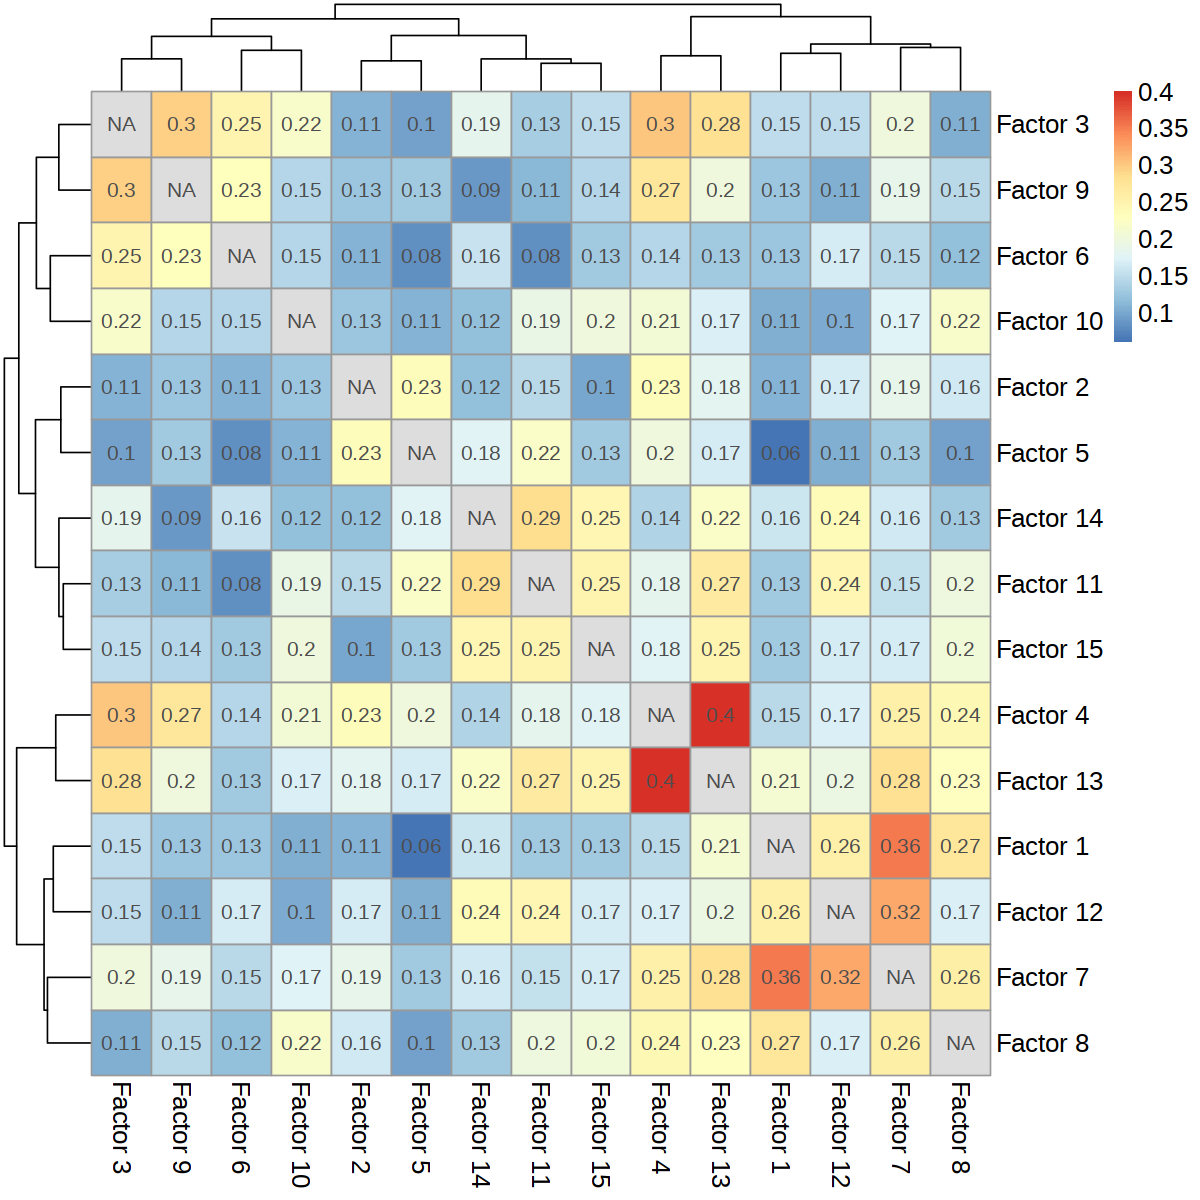

In [153]:
options(repr.plot.width=10, repr.plot.height=10)
#jaccGenDist[lower.tri(jaccGenDist)] <- NA

xx = pheatmap(jaccGenDist_1, cluster_rows = TRUE,
         cluster_cols=TRUE,
         clustering_distance_rows="euclidean", 
         display_numbers = round(jaccGenDist_1,2),
         method="ward.D2",
clustering_distance_cols="euclidean", 
         fontsize = 15)

#save_pheatmap_pdf(xx, "Figure_S4F.pdf", width=10, height=10)

In [154]:
# corrplot::corrplot(as.matrix(jaccGenDist), order = 'AOE', 
#                     method = 'number', is.corr = FALSE, tl.cex = 1.5,
#                    diag = FALSE, type = 'upper')

In [155]:
GenesFactorMatrix = data.frame(matrix(0, ncol = length(unique(unlist(myICAFactors_genes))), nrow= nFactors))
rownames(GenesFactorMatrix) <- paste0("Factor ", 1:nrow(GenesFactorMatrix))
colnames(GenesFactorMatrix) <- sort(unique(unlist(myICAFactors_genes)))

factorNames = paste0("Factor ", sapply(colnames(myICAFactors_genes), 
                                       function(x){return(strsplit(x,"\\.")[[1]][2])} ))


for(i in 1:ncol(myICAFactors_genes)){
    facGenes = myICAFactors_genes[,i]
    facGenes = facGenes[facGenes != " "]
    GenesFactorMatrix[factorNames[i],facGenes] = 1
}

GenesFactorMatrix = t(GenesFactorMatrix)
GenesFactorMatrix = GenesFactorMatrix[order(-GenesFactorMatrix[,1],-GenesFactorMatrix[,2], -GenesFactorMatrix[,3], -GenesFactorMatrix[,4], -GenesFactorMatrix[,5],
                     -GenesFactorMatrix[,6],-GenesFactorMatrix[,7], -GenesFactorMatrix[,8], -GenesFactorMatrix[,9], -GenesFactorMatrix[,10],
                     -GenesFactorMatrix[,11],-GenesFactorMatrix[,12], -GenesFactorMatrix[,13], -GenesFactorMatrix[,14], -GenesFactorMatrix[,15]
                   ),]
GenesFactorMatrix = t(GenesFactorMatrix) 

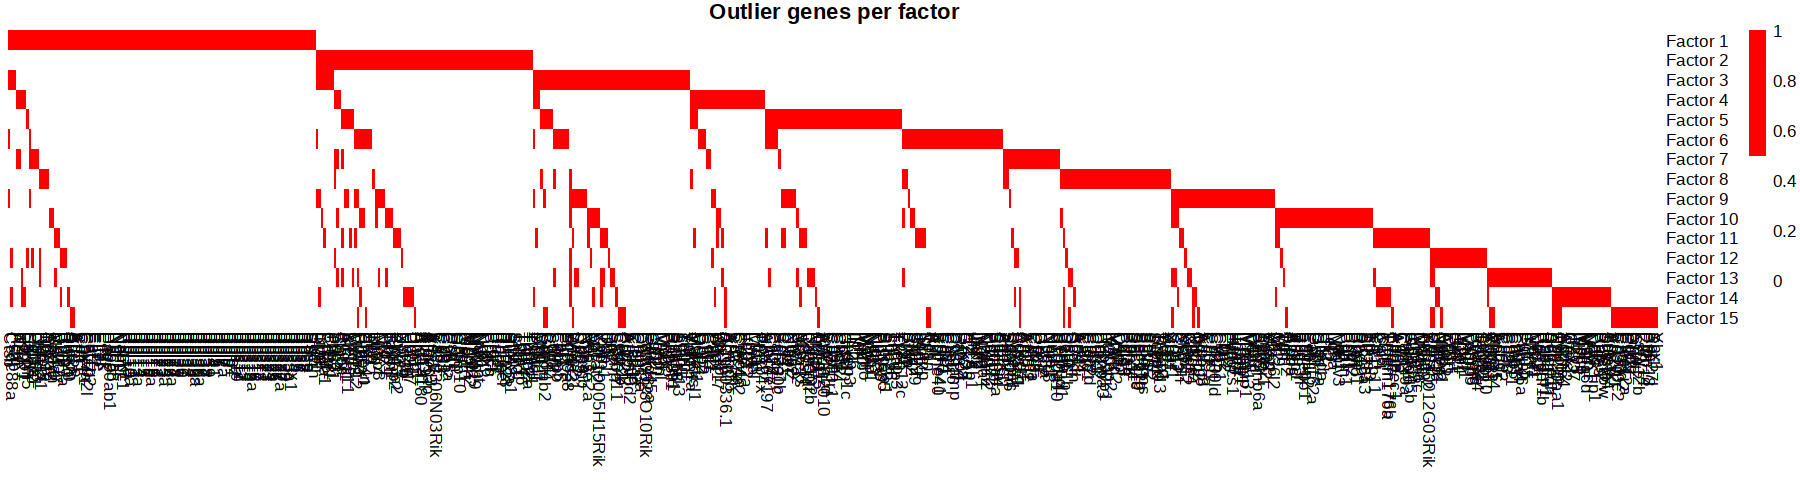

In [156]:
options(repr.plot.width=15, repr.plot.height=4)

xx = pheatmap(GenesFactorMatrix, border_color="black", color = c("white","red"),cluster_cols = FALSE,method="ward.D2",cluster_rows = FALSE,
         main = "Outlier genes per factor", fontsize_col = 10,treeheight_col = 0, treeheight_row = 0)

#save_pheatmap_pdf(xx, "Figure_S4B.pdf", width=15, height=4)

In [157]:
options(repr.plot.width=10, repr.plot.height=10)

jaccGenDist = data.frame(matrix(0, nrow = nFactors, ncol = nFactors))
colnames(jaccGenDist) <- rownames(GenesFactorMatrix)
rownames(jaccGenDist) <- rownames(GenesFactorMatrix)

for(i in 1:nFactors){
  for(j in 1:nFactors){
    jaccGenDist[i,j] = jaccardSets(colnames(GenesFactorMatrix)[GenesFactorMatrix[paste0("Factor ",i),] ==  1],
                                   colnames(GenesFactorMatrix)[GenesFactorMatrix[paste0("Factor ",j),] ==  1])
  }
}

diag(jaccGenDist) <- NA





In [158]:
rownames(jaccGenDist)

[1] "Factor 1"  "Factor 2"  "Factor 3"  "Factor 4"  "Factor 5"  "Factor 6" 
 [7] "Factor 7"  "Factor 8"  "Factor 9"  "Factor 10" "Factor 11" "Factor 12"
[13] "Factor 13" "Factor 14" "Factor 15"

png 
  2

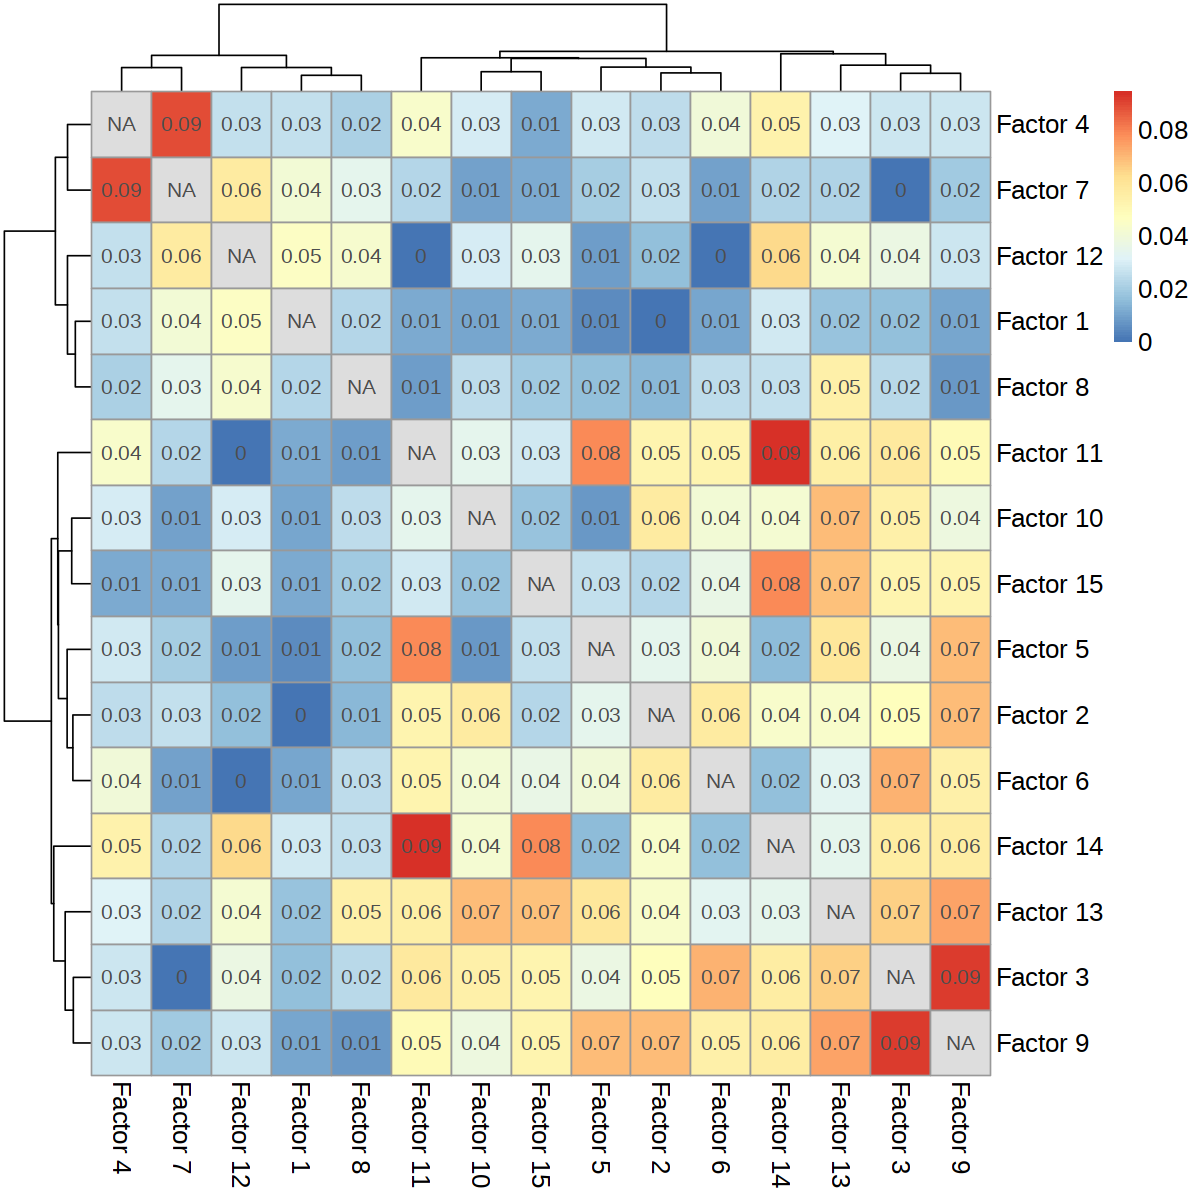

In [159]:
options(repr.plot.width=10, repr.plot.height=10)

xx = pheatmap(jaccGenDist, clustering_method="ward.D2",
 clustering_distance_rows="euclidean", 
         display_numbers = round(jaccGenDist,2),
clustering_distance_cols="euclidean", 
         fontsize = 15)

save_pheatmap_pdf(xx, "S_5G.pdf", width=10, height=10)

In [160]:
rcOrder = rownames(jaccGenDist)[xx$tree_col$order]

png 
  2

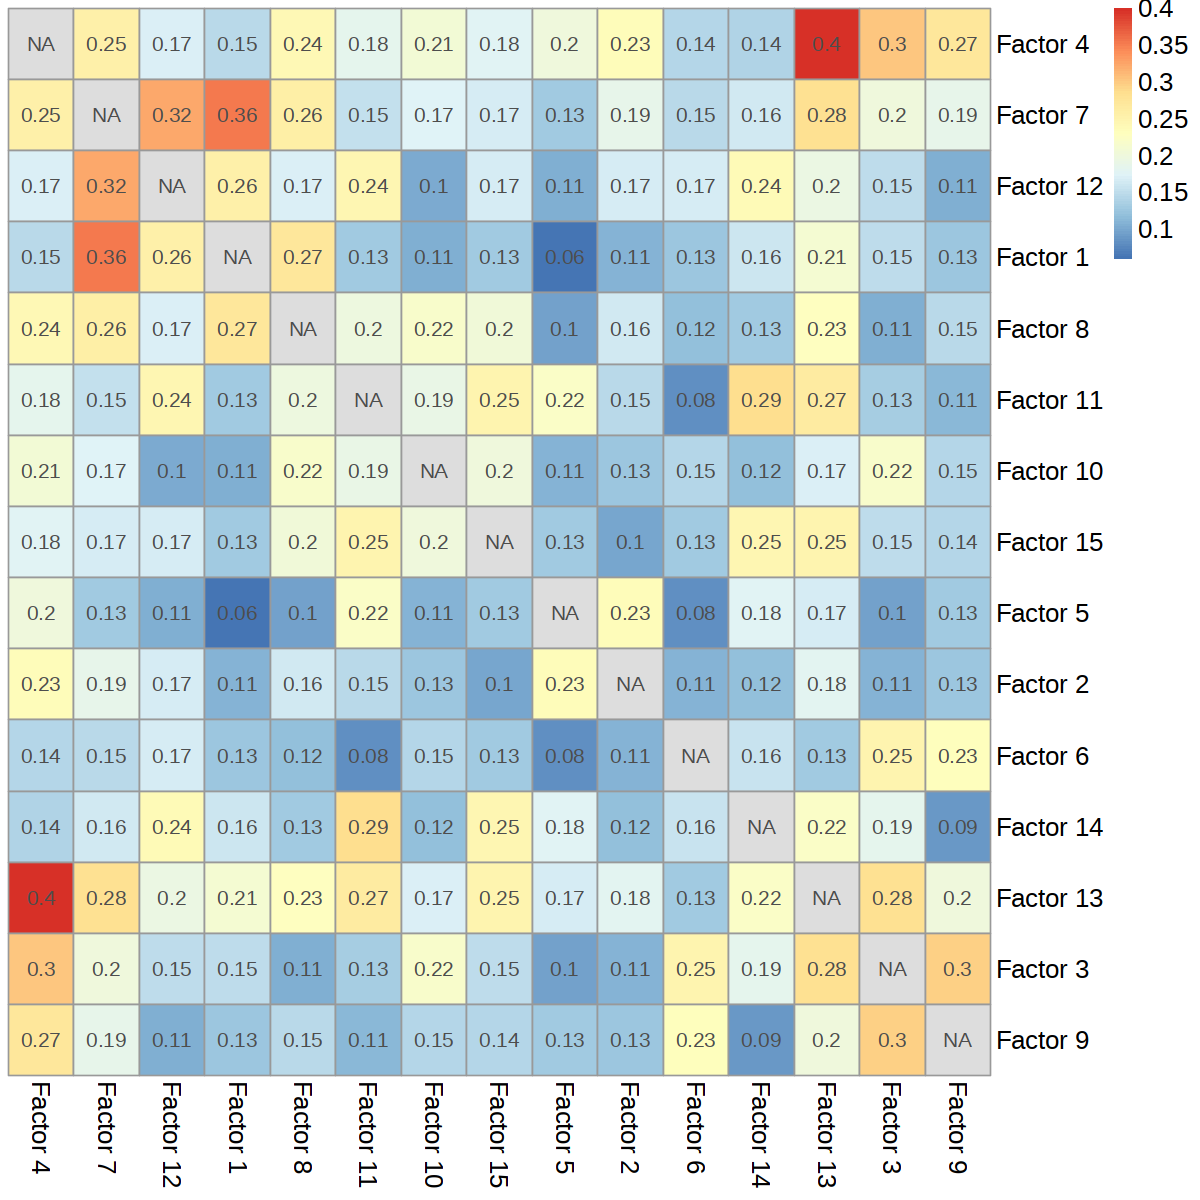

In [161]:
options(repr.plot.width=10, repr.plot.height=10)

xx = pheatmap(jaccGenDist_1[rcOrder, rcOrder], 
              cluster_rows=FALSE,
              cluster_cols=FALSE,
 clustering_distance_rows="euclidean", 
         display_numbers = round(jaccGenDist_1[rcOrder, rcOrder],2),
clustering_distance_cols="euclidean", 
         fontsize = 15)

save_pheatmap_pdf(xx, "S_5H.pdf", width=10, height=10)